# Analysis of Gene Expression and Neuronal Projections in Parkinson's Disease-related Regions and Genes

## Group 5
### Nora Lyang, Sidney Aki, Juliana Perapalanunt

# Introduction & Background

## Abstract

Gene expression data from the three brain regions, Substantia Nigra reticular (SNr), Ventral Tegmental Area (VTA), and globus pallidus externa (GPe), were obtained from the Allen Brain MicroArray database and the data was narrowed down to the genes with high expression levels. Neuronal projections from the three brain regions were obtained from the Allen Mouse Brain Connectivity database. Gene expression data and neuronal connectivity data were used to analyze the possible link between genes expression levels in brain regions affected by Parkinson’s Disease (PD) and which regions those genes project to further understand symptoms of PD. Of the genes tested, *SLC6A3* and *TH* seemed to be differentially expressed to be higher in the SNr and VTA and lower in the GPe, and showed *DBH* little to no change in expression in varying regions. 

## Research Question

Is there differential gene expression (measured by gene expression level from MicroArray data) in regions associated with PD, specifically the SNr, VTA, and GPe, and where do these regions project to most often (measured by projection density of normalized fluorescence data from Mouse Cell Connectivity data)?

## Background & Prior Work

PD is a pervasive neurodegenerative disorder that has an estimated prevalence of 572 people per 100,000 of people over 45 years of age [25] and is characterized by resting tremor, bradykinesia, stiffness and movement instability [24]. The disease has been shown to have molecular and genetic components that can have effects on specific brain regions. The SNr is one region in the midbrain that is associated with PD; SNr dopaminergic neurons are irreversibly lost over time, leading to motor control loss [34]. One microarray experiment compared the gene expression of cells within the midbrain of normal controls to those from PD brains to confirm cellular functions that are affected by PD and found that GABAergic synapses are reduced in the SN of PD, causing the reduction of dopaminergic neuron inhibition and therefore excessive firing to make it difficult for PD patients to control their movements [7]. 

The VTA is also a region in the midbrain characterized by its dopaminergic neurons and is associated with PD. A study found that dopaminergic neurons in the VTA degenerate in PD, but it remains unclear how this plays a part in PD symptoms [1]. A third region that has been implicated in PD is the GPe, which normally functions to facilitate movement. The research on the relationship between the GPe and PD is limited but one case study on a patient with a lesioned GP performed various experiments to test the patient’s motor skills and found that the motor performance was similar to patients with PD due to the degeneration of the nigrostriatal pathway, which connects the substantia nigra pars compacta with the dorsal striatum [3]. Our group is interested in finding a possible link between the differential gene expression in these three brain regions associated with PD and the brain locations these regions project to to attempt and understand the motor functional loss that is associated with PD.

We analyzed the three brain regions -- the SNr, VTA, and GPe, which are affected in PD patients. Using the differential gene expression data from the Allen Brain MicroArray database, we analyzed which genes are highly and lowly expressed in these brain regions. The microarray database has gene expression data in the human brain from 6 control patients with no neuropsychiatric or neuropathic history [2]. Data was collected by using DTI/MRI imaging to get location specific tissue samples that researchers then purified to be used in microarray analysis, which outputs the amount of mRNA associated with each sample to be used as a quantification of gene expression in that sample; it can then be assembled to understand how genes are expressed in certain brain structures versus others [2]. We found our target genes *SLC6A3*, *TH*, and *DBH* by choosing whichever genes were both Parkinson’s associated genes from the microarray database and were also in the connectivity database as transgenic Cre-lines. Once we had an idea of how our target genes are expressed in our target regions through microarray data interpreting, we wanted to understand how the regions interact with other brain regions through neural circuits using dopaminergic neuronal projections from the Connectivity database. 

The Allen Mouse Brain Connectivity database uses the Cre/Lox genetic engineering method to visualize connectivity patterns in mice models. The database is a map of neural connections in the mouse brain -- axonal projections are labeled by viral tracers in transgenic mice that were genetically engineered to target specific cell types [4]. Neurons that express these viral tracers are labeled with fluorescence, which can be captured through two-photon imaging and further quantified. By filtering through the genes that are associated with PD with the available data from transgene expression in Cre-lines to isolate the Cre-lines with relevant information on these genes, we attained the target transgenic lines Slc6a3-Cre, Th-IRES-CreER, Th-Cre-FI172, and Dbh-Cre_KH212. Since there were missing Cre-line experiments in our regions of interest, we also used the Connectivity database to obtain the Wild Type (WT) data for each target region. With these selected Cre-lines and WT data, we observed the projection density of the normalized fluorescence data. Given the injection site and density, we then acquired the secondary regions that the three brain regions project to for each Cre-line and WT. After selecting for the top three secondary regions that have the highest projection densities, we researched the functions of these regions to see if they had any possible links to the PD pathology.

## Hypothesis

Since dopaminergic neurons degenerate in patients with PD and PD is primarily a neurological disease [28], we hypothesized that there may be an association between genes that are highly expressed in brain regions affected by Parkinson’s and the other brain regions these neurons project to that may be related to the pathology of Parkinson’s disease. 

 The SNr, VTA, and GPe segment are brain regions affected by Parkinson’s that cause issues in controlling movement and coordination [29], which is why we chose them as our regions of interest.  Because of this, we believed that there should be genes that are differentially expressed between these regions. The regions that neurons of these genes normally project to are expected to be ones that normally function to allow standard motor control and movement in the human body but deteriorate in PD patients, since the disease is characterized by a loss in motor control. 


# MicroArray Data Wrangling

### Using Microarray Dataset to Find Human Microarray Gene Expressions Related to Parkinson's Disease in Substantia Nigra Pars Reticulata, Ventral Tegmental Area (VTA), and Globus Pallidus External Segment

We will be using the microarray to see if there's a link between gene expression in our target regions with connectivity in those same regions. The Human Microarray Expression database (https://human.brain-map.org) allows us to pull gene expression levels in donors whos brain structures have been subjected to purification to see the amount of mRNA in each tissue sample [2] -- all data associated was then quantified and normalized.

In [1]:
#Importing necessary toolkits 
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from functools import reduce
import statistics
import requests
import json

## Finding Gene Matches With Driver Lines

Because we're using both connectivity and microarray datasets, we have to have a way to effectviely link the two in a way to get usable data and findings. The connectivity dataset has a dataframe of all its experiments and the mouse strain name used, and the microarray has been tested on hundreds of Parkinson's related genes [2][4]. By choosing the genes that are both tested in the mouse Cre strain and in the microarray, we can then better compare the two datasets.

In [2]:
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache

mcc = MouseConnectivityCache()
all_experiments = mcc.get_experiments(dataframe=True)

In [3]:
#Create a dataframe of all the experimental data
data = pd.DataFrame(all_experiments)
data.head()

,gender,injection_structures,injection_volume,injection_x,injection_y,injection_z,product_id,specimen_name,strain,structure_abbrev,structure_id,structure_name,transgenic_line,transgenic_line_id,id,primary_injection_structure
id,,,,,,,,,,,,,,,,
527712447,F,"[502, 926, 1084, 484682470]",0.006655,9240,3070,8990,5,Penk-IRES2-Cre-neo-249961,C57BL/6J,SUB,502,Subiculum,Penk-IRES2-Cre-neo,298725927.0,527712447,502
301875966,M,"[574, 931]",0.105746,9170,6850,6200,5,Gabrr3-Cre_KC112-3467,C57BL/6J,PG,931,Pontine gray,Gabrr3-Cre_KC112,177838877.0,301875966,574
520336173,M,"[1, 210, 491, 525, 1004]",0.025762,7810,6550,6450,5,Hdc-Cre_IM1-204103,None,TMv,1,"Tuberomammillary nucleus, ventral part",Hdc-Cre_IM1,177839494.0,520336173,1
307160976,F,[304325711],0.013590,5580,7040,6270,31,Cdh4-Cre-215,None,retina,304325711,retina,Cdh4-CreER,308603472.0,307160976,304325711
644250774,F,[329],0.006724,6990,2150,2130,36,A930038C07Rik-Tg1-Cre-347488,None,SSp-bfd,329,"Primary somatosensory area, barrel field",A930038C07Rik-Tg1-Cre,177838542.0,644250774,329


In [4]:
#Extract gene name from transgenic_line name in Connectivity data
gene_list = list()
for transgenic_line in data['transgenic_line']:
    if transgenic_line != None:
        #Take whatever is before the first - in the name as the gene argument
        gene = transgenic_line.split('-')[0].upper()
        #In some cases, instead of -, some genes have parentheses, so take care of these special cases
        if '(' in gene:
            gene = gene.split('(')[0]
        gene_list.append(gene)
gene_list

['PENK',
 'GABRR3',
 'HDC',
 'CDH4',
 'A930038C07RIK',
 'AI75',
 'SCNN1A',
 'ETV1',
 'AI75',
 'SLC17A6',
 'AI75',
 'PENK',
 'NOS1',
 'GAD2',
 'GRM2',
 'PRKCD',
 'GPR26',
 'GAD2',
 'TLX3',
 'CHRNA2',
 'INS2',
 'SYT6',
 'CALB2',
 'CHRNA2',
 'SLC17A6',
 'RBP4',
 'CUX2',
 'ETV1',
 'EMX1',
 'DBH',
 'EMX1',
 'SYT6',
 'AI75',
 'CUX2',
 'SLC6A4',
 'RBP4',
 'EMX1',
 'GRP',
 'NOS1',
 'EMX1',
 'SLC17A6',
 'SLC32A1',
 'TLX3',
 'GNG7',
 'EMX1',
 'OXT',
 'CUX2',
 'RBP4',
 'NTSR1',
 'TLX3',
 'GAD2',
 'CUX2',
 'NOS1',
 'EMX1',
 'TLX3',
 'PDZK1IP1',
 'SLC17A8',
 'GRIK4',
 'CART',
 'NTRK1',
 'CHAT',
 'SCNN1A',
 'PPP1R17',
 'GNRH1',
 'AI75',
 'NPR3',
 'GPR26',
 'SIM1',
 'SYT6',
 'CUX2',
 'CHRNA2',
 'NTSR1',
 'PVALB',
 'GRIK4',
 'TLX3',
 'HCRT',
 'CORT',
 'PDZK1IP1',
 'CUX2',
 'SYT6',
 'TLX3',
 'CNNM2',
 'GAD2',
 'RBP4',
 'AI75',
 'CALB2',
 'AI75',
 'DRD1A',
 'AI75',
 'PRKCD',
 'SLC17A6',
 'SIM1',
 'GAD2',
 'NPR3',
 'A930038C07RIK',
 'CALB1',
 'SYT17',
 'PCP2',
 'PPP1R17',
 'ETV1',
 'DRD3',
 'DRD3',
 'SCN

In [5]:
#Get probe data in order to compare gene matches in both Parkinson's related genes and in 
#driver lines to be able to later use data from mouse connectivity dataset have to 
#upload manually since can't get this data filtered for Parkinson's related genes in the API
probes_df = pd.read_csv('./Final Project Data/Probes.csv')
probes_df.head()

,id,name,gene-id,gene-symbol,gene-name,entrez-id,chromosome,start-position,end-position
0,1059344,A_24_P326635,153,ADRBK1,"adrenergic, beta, receptor kinase 1",156,11,NaN,NaN
1,1059345,CUST_11695_PI416261804,153,ADRBK1,"adrenergic, beta, receptor kinase 1",156,11,NaN,NaN
2,1059343,CUST_68_PI416408490,153,ADRBK1,"adrenergic, beta, receptor kinase 1",156,11,NaN,NaN
3,1059340,A_23_P251686,154,ADRBK2,"adrenergic, beta, receptor kinase 2",157,22,NaN,NaN
4,1059341,A_24_P378928,154,ADRBK2,"adrenergic, beta, receptor kinase 2",157,22,NaN,NaN


In [6]:
#Find matches between Parkinson's related genes and genes used for transgenic lines available
transgenic_gene_matches = set()  #Use set to avoid duplicate matches of same gene
for gene_symbol in probes_df['gene-symbol']:
    if gene_symbol in gene_list:
        transgenic_gene_matches.add(gene_symbol)
transgenic_gene_matches = list(transgenic_gene_matches)
print(transgenic_gene_matches)

['DBH', 'TH', 'SLC6A3']


Our outputs show that the gene matches are ***SLC6A3, TH, and DBH***. These are then our genes of focus, since they have both been tested in the microarray and are in mouse connectivity lines as well. 

According to the NIH genetics database, the *SLC6A3* gene provides instructions for making a protein called the dopamine transporter or DAT. This protein is embedded in the membrane of neurons in the brain, where it transports a molecule called dopamine into the cell [30].

The *TH* gene provides instructions for making the enzyme tyrosine hydroxylase, which is important for normal functioning of the nervous system. Tyrosine hydroxylase takes part in the first step of the pathway that produces a group of hormones called catecholamines. This enzyme helps convert the protein building block (amino acid) tyrosine to a catecholamine called dopamine [33]. 

The *DBH* gene provides instructions for producing the enzyme dopamine beta (β)-hydroxylase. This enzyme converts dopamine to norepinephrine, both of which are chemical messengers (neurotransmitters) that transmit signals between nerve cells [13].

# To Get Brain Structure IDs

To interact with the microarray data, we'll be using an RMA query to pull information from the website. By getting the brain IDs of what structures we want, we can later filter through the data using the IDs. Our brain regions of interest are the Substantia Nigra Pars Reticulata (SNr), Ventral Tegmental Area (VTA), and Globus Pallidus External Segment (GPe), since they all have been shown to be involved with Parkinson's Disease in some way [1][7][3].

In [7]:
service = 'http://api.brain-map.org/api/v2/data/query.json?criteria=' 

#Since the microarray was tested in both left and right pars compacta of the SN, we'll get the data for both
#and eventually combine the two expression levels to get overall pars compacta value
# To get the ID for substantia nigra pars compacta left
brain_area_SN_L = 'substantia nigra, pars reticulata, left'
ontology_id = 'Human Brain Atlas'

SN_L_structure_result = requests.get('%smodel::Structure,\
    rma::criteria,[name$il\'%s\'],ontology[name$eq\'%s\']' % (service,brain_area_SN_L,ontology_id)).json()
SN_L_structure_id = SN_L_structure_result['msg'][0]['id']
print('The brain area ID for substantia nigra pars reticulata left is' , SN_L_structure_id)

# To get the ID for substantia nigra pars compacta right
brain_area_SN_R = 'substantia nigra, pars reticulata, right'
ontology_id = 'Human Brain Atlas'

SN_R_structure_result = requests.get('%smodel::Structure,\
    rma::criteria,[name$il\'%s\'],ontology[name$eq\'%s\']' % (service,brain_area_SN_R,ontology_id)).json()
SN_R_structure_id = SN_R_structure_result['msg'][0]['id']
print('The brain area ID for substantia nigra pars reticulata right is' , SN_R_structure_id)


# To get the ID for ventral tegmental area
brain_area_VTA = 'ventral tegmental area'
ontology_id = 'Human Brain Atlas'

VTA_structure_result = requests.get('%smodel::Structure,\
    rma::criteria,[name$il\'%s\'],ontology[name$eq\'%s\']' % (service,brain_area_VTA,ontology_id)).json()

VTA_structure_id = VTA_structure_result['msg'][0]['id']
print('The brain area ID for ventral tegmental area is' , VTA_structure_id)


# To get the ID for globus pallidus external segment
brain_area_GPe = 'globus_pallidus, external segment'
ontology_id = 'Human Brain Atlas'

GPe_structure_result = requests.get('%smodel::Structure,\
    rma::criteria,[name$il\'%s\'],ontology[name$eq\'%s\']' % (service,brain_area_GPe,ontology_id)).json()

GPe_structure_id = GPe_structure_result['msg'][0]['id']
print('The brain area ID for globus pallidus, external segment is' , GPe_structure_id)

The brain area ID for substantia nigra pars reticulata left is 9075
The brain area ID for substantia nigra pars reticulata right is 9078
The brain area ID for ventral tegmental area is 9066
The brain area ID for globus pallidus, external segment is 12897


# To Get Gene IDs


Next, we can get the IDs for the gene probes of our genes of interest decided on previously. Getting the IDs will allow us to further filter through the gene expression data available to get the expression data for the specific genes we want.

In [8]:
# To get the ID for SLC6A3
gene_acronym_SLC6A3 = 'SLC6A3'
probe_type = 'DNA'
product_abbrev = 'HumanMA'

result = requests.get('%smodel::Probe, \
    rma::criteria,[probe_type$eq\'%s\'],products[abbreviation$eq\'%s\'],gene[acronym$eq\'%s\']' \
                      % (service,probe_type,product_abbrev,gene_acronym_SLC6A3)).json()

probe_id_SLC6A3 = [] 
for i in range(len(result['msg'])):
    probe_id_SLC6A3.append(result['msg'][i]['id'])

print("The probe IDs for", gene_acronym_SLC6A3, "are" , probe_id_SLC6A3)


# To get the ID for TH
gene_acronym_TH = 'TH'
probe_type = 'DNA'
product_abbrev = 'HumanMA'

result = requests.get('%smodel::Probe, \
    rma::criteria,[probe_type$eq\'%s\'],products[abbreviation$eq\'%s\'],gene[acronym$eq\'%s\']' \
                      % (service,probe_type,product_abbrev,gene_acronym_TH)).json()

probe_id_TH = [] 
for i in range(len(result['msg'])):
    probe_id_TH.append(result['msg'][i]['id'])

print("The probe IDs for", gene_acronym_TH, "are",probe_id_TH)

  
# To get the ID for DBH
gene_acronym_DBH = 'DBH'
probe_type = 'DNA'
product_abbrev = 'HumanMA'

result = requests.get('%smodel::Probe, \
    rma::criteria,[probe_type$eq\'%s\'],products[abbreviation$eq\'%s\'],gene[acronym$eq\'%s\']' \
                      % (service,probe_type,product_abbrev,gene_acronym_DBH)).json()

probe_id_DBH = [] 
for i in range(len(result['msg'])):
    probe_id_DBH.append(result['msg'][i]['id'])

print("The probe IDs for", gene_acronym_DBH, "are", probe_id_DBH)

The probe IDs for SLC6A3 are [1051517, 1051500, 1051520, 1051510, 1051502, 1051501]
The probe IDs for TH are [1026629, 1026626, 1026642]
The probe IDs for DBH are [1057719, 1057720, 1057721]


# To Get Donor Data 

The microarray database has data for multiple donors, which may not have data for gene expression in the specific brain structures we previously decided on. To see which donors have the data we need to later filter through them as done with the structures and gene probe IDs, we can check to see how many donors have data for our genes of interest in each brain region.

In [9]:
#To get data for all donors with SLC6A3 expression data at the substantia nigra pars reticulata left
SLC6A3_SNrl = requests.get("%sservice::human_microarray_expression\
                        [structures$eq9075][probes$eq1051517, 1051500, 1051520, 1051510, 1051502, 1051501]" % (service)).json()
SLC6A3_SNrl_donor = SLC6A3_SNrl['msg']['samples']

SLC6A3_SNrl_id = set()
for sample in SLC6A3_SNrl_donor:
    sample_id_2 = sample['donor']['id']
    SLC6A3_SNrl_id.add(sample_id_2)
print ('SLC6A3 SNrl donor IDs:', list(SLC6A3_SNrl_id))


#To get data for all donors with TH expression data at the substantia nigra pars reticulata left
TH_SNrl = requests.get("%sservice::human_microarray_expression\
                    [structures$eq9075][probes$eq1026629, 1026626, 1026642]" % (service)).json()
TH_SNrl_donor = TH_SNrl['msg']['samples']

TH_SNrl_id = set()
for donor in TH_SNrl_donor:
    donor_id_2 = donor['donor']['id']
    TH_SNrl_id.add(donor_id_2)
print ('TH SNrl donor IDs:', list(TH_SNrl_id))


#To get data for all donors with DBH expression data at the substantia nigra pars reticulata left
DBH_SNrl = requests.get("%sservice::human_microarray_expression\
                    [structures$eq9075][probes$eq1057719, 1057720, 1057721]" % (service)).json()
DBH_SNrl_donor = DBH_SNrl['msg']['samples']

DBH_SNrl_id = set()
for donor in DBH_SNrl_donor:
    donor_id_2 = donor['donor']['id']
    DBH_SNrl_id.add(donor_id_2)
print ('DBH SNrl donor IDs:', list(DBH_SNrl_id))


SLC6A3 SNrl donor IDs: [10021, 9861, 15496, 12876, 14380, 15697]
TH SNrl donor IDs: [10021, 9861, 15496, 12876, 14380, 15697]
DBH SNrl donor IDs: [10021, 9861, 15496, 12876, 14380, 15697]


In [10]:
#To get data for all donors with SLC6A3 expression data at the substantia nigra pars reticulata right
SLC6A3_SNrr = requests.get("%sservice::human_microarray_expression[structures$eq9078]\
                        [probes$eq1051517, 1051500, 1051520, 1051510, 1051502, 1051501]" % (service)).json()
SLC6A3_SNrr_donor = SLC6A3_SNrr['msg']['samples']

SLC6A3_SNrr_id = set()
for sample in SLC6A3_SNrr_donor:
    sample_id_2 = sample['donor']['id']
    SLC6A3_SNrr_id.add(sample_id_2)
print ('SLC6A3 SNrr donor IDs:', list(SLC6A3_SNrr_id))


#To get data for all donors with TH expression data at the substantia nigra pars reticulata right
TH_SNrr = requests.get("%sservice::human_microarray_expression\
                    [structures$eq9078][probes$eq1026629, 1026626, 1026642]" % (service)).json()
TH_SNrr_donor = TH_SNrr['msg']['samples']

TH_SNrr_id = set()
for donor in TH_SNrr_donor:
    donor_id_2 = donor['donor']['id']
    TH_SNrr_id.add(donor_id_2)
print ('TH SNrr donor IDs:', list(TH_SNrr_id))


#To get data for all donors with DBH expression data at the substantia nigra pars reticulata right
DBH_SNrr = requests.get("%sservice::human_microarray_expression\
                    [structures$eq9078][probes$eq1057719, 1057720, 1057721]" % (service)).json()
DBH_SNrr_donor = DBH_SNrr['msg']['samples']

DBH_SNrr_id = set()
for donor in DBH_SNrr_donor:
    donor_id_2 = donor['donor']['id']
    DBH_SNrr_id.add(donor_id_2)
print ('DBH SNrr donor IDs:', list(DBH_SNrr_id))


SLC6A3 SNrr donor IDs: [10021, 9861]
TH SNrr donor IDs: [10021, 9861]
DBH SNrr donor IDs: [10021, 9861]


In [11]:
#To get data for all donors with SLC6A3 expression data at the ventral tegmental area
SLC6A3_VTA = requests.get("%sservice::human_microarray_expression\
                        [structures$eq9066][probes$eq1051517, 1051500, 1051520, 1051510, 1051502, 1051501]" % (service)).json()
SLC6A3_VTA_donor = SLC6A3_VTA['msg']['samples']

SLC6A3_VTA_id = set()
for sample in SLC6A3_VTA_donor:
    sample_id_2 = sample['donor']['id']
    SLC6A3_VTA_id.add(sample_id_2)
print ('SLC6A3 VTA donor IDs:', list(SLC6A3_VTA_id))


#To get data for all donors with TH expression data at the ventral tegmental area
TH_VTA = requests.get("%sservice::human_microarray_expression\
                    [structures$eq9066][probes$eq1026629, 1026626, 1026642]" % (service)).json()
TH_VTA_donor = TH_VTA['msg']['samples']

TH_VTA_id = set()
for donor in TH_VTA_donor:
    donor_id_2 = donor['donor']['id']
    TH_VTA_id.add(donor_id_2)
print ('TH VTA donor IDs:', list(TH_VTA_id))


#To get data for all donors with DBH expression data at the ventral tegmental area
DBH_VTA = requests.get("%sservice::human_microarray_expression\
                    [structures$eq9066][probes$eq1057719, 1057720, 1057721]" % (service)).json()
DBH_VTA_donor = DBH_VTA['msg']['samples']

DBH_VTA_id = set()
for donor in DBH_VTA_donor:
    donor_id_2 = donor['donor']['id']
    DBH_VTA_id.add(donor_id_2)
print ('DBH VTA donor IDs:', list(DBH_VTA_id))

SLC6A3 VTA donor IDs: [10021, 9861, 15496, 12876, 14380, 15697]
TH VTA donor IDs: [10021, 9861, 15496, 12876, 14380, 15697]
DBH VTA donor IDs: [10021, 9861, 15496, 12876, 14380, 15697]


In [12]:
#To get data for all donors with SLC6A3 expression data at the globus pallidus external segment
SLC6A3_GP = requests.get("%sservice::human_microarray_expression\
                        [structures$eq12897][probes$eq1051517, 1051500, 1051520, 1051510, 1051502, 1051501]" % (service)).json()
SLC6A3_GP_donor = SLC6A3_GP['msg']['samples']

SLC6A3_GP_id = set()
for sample in SLC6A3_GP_donor:
    sample_id_2 = sample['donor']['id']
    SLC6A3_GP_id.add(sample_id_2)
print ('SLC6A3 GP external donor IDs:', list(SLC6A3_GP_id))


#To get data for all donors with TH expression data at the globus pallidus external segment
TH_GP = requests.get("%sservice::human_microarray_expression\
                    [structures$eq12897][probes$eq1026629, 1026626, 1026642]" % (service)).json()
TH_GP_donor = TH_GP['msg']['samples']

TH_GP_id = set()
for donor in TH_GP_donor:
    donor_id_2 = donor['donor']['id']
    TH_GP_id.add(donor_id_2)
print ('TH GP external donor IDs:', list(TH_GP_id))


#To get data for all donors with DBH expression data at the globus pallidus external segment
DBH_GP = requests.get("%sservice::human_microarray_expression\
                    [structures$eq12897][probes$eq1057719, 1057720, 1057721]" % (service)).json()
DBH_GP_donor = DBH_GP['msg']['samples']

DBH_GP_id = set()
for donor in DBH_GP_donor:
    donor_id_2 = donor['donor']['id']
    DBH_GP_id.add(donor_id_2)
print ('DBH GP external donor IDs:', list(DBH_GP_id))

SLC6A3 GP external donor IDs: [10021, 9861, 15496, 12876, 15697]
TH GP external donor IDs: [10021, 9861, 15496, 12876, 15697]
DBH GP external donor IDs: [10021, 9861, 15496, 12876, 15697]


In [13]:
#Making the donor id's into a list to be later called upon in code to filter through
SNrl_donor_list = list(SLC6A3_SNrl_id)
SNrr_donor_list = list(SLC6A3_SNrr_id)
VTA_donor_list = list(SLC6A3_VTA_id)
GP_donor_list = list(SLC6A3_GP_id)

# Getting the Median Gene Expression Data Per Brain Structure

Since we've now attained all the necessary donor information, structure IDs, and probe IDs, we can get the get the gene expression data for points that fufill all three of our criteria and get the gene expression for our genes of interest in each region using the donor ID's found.

## Substantia Nigra Reticulata, Left

In [14]:
#To get the expression levels of SLC6A3 per probe for each donor in the substantia nigra reticulata, left
SLC6A3_median_expression_lvls_SNrl = list()
for donor in SNrl_donor_list:
    SLC6A3_donor_expression_lvls_SNrl = list()  #List to store median expression levels for each probe
    for probe in probe_id_SLC6A3:
        SLC6A3_exp = requests.get("%sservice::human_microarray_expression\
            [structures$eq9075][probes$eq%s][donors$eq%s]" % (service, probe, donor)).json()
        SLC6A3_df = pd.DataFrame(SLC6A3_exp['msg']['probes'])

        #Since there are multiple readings for each probe, we take the median
        #convert the string into a float in order to take the median
        SLC6A3_probe_expression_lvls_SNrl = [float(exp_lvl) for exp_lvl in SLC6A3_df['expression_level'][0]]
        SLC6A3_donor_expression_lvls_SNrl.append(statistics.median(SLC6A3_probe_expression_lvls_SNrl))
    
    #Since multiple probes match to the same gene, 
    #we take the median again to make one median expression level per donor
    SLC6A3_median_expression_lvls_SNrl.append(statistics.median(SLC6A3_donor_expression_lvls_SNrl))

    

#Zip together donor and expression levels to make printing easier
SLC6A3_expression_lvl_by_donor_SNrl = list(zip(SNrl_donor_list, SLC6A3_median_expression_lvls_SNrl))
for donor, exp_lvl in SLC6A3_expression_lvl_by_donor_SNrl:
    print("Donor", donor, "has a median expression level of", exp_lvl, "in the Substantia Nigra Reticulata, Left for SLC6A3 gene")
    
#Create df in order to make a table later
SLC6A3_expression_lvl_dict_SNrl = {'donor_id': SNrl_donor_list, 'SLC6A3_median_expression_levels_SNrl': SLC6A3_median_expression_lvls_SNrl}
SLC6A3_df_SNrl = pd.DataFrame(SLC6A3_expression_lvl_dict_SNrl).set_index('donor_id')

Donor 10021 has a median expression level of 7.089650000000001 in the Substantia Nigra Reticulata, Left for SLC6A3 gene
Donor 9861 has a median expression level of 4.22335 in the Substantia Nigra Reticulata, Left for SLC6A3 gene
Donor 15496 has a median expression level of 6.971675 in the Substantia Nigra Reticulata, Left for SLC6A3 gene
Donor 12876 has a median expression level of 5.97445 in the Substantia Nigra Reticulata, Left for SLC6A3 gene
Donor 14380 has a median expression level of 7.5077 in the Substantia Nigra Reticulata, Left for SLC6A3 gene
Donor 15697 has a median expression level of 5.6246 in the Substantia Nigra Reticulata, Left for SLC6A3 gene


In [15]:
#To get the expression levels of TH per probe for each donor in the substantia nigra reticulata, left
TH_median_expression_lvls_SNrl = list()
for donor in SNrl_donor_list:
    TH_donor_expression_lvls_SNrl = list()  #List to store median expression levels for each probe
    for probe in probe_id_TH:
        TH_exp = requests.get("%sservice::human_microarray_expression\
            [structures$eq9075][probes$eq%s][donors$eq%s]" % (service, probe, donor)).json()
        TH_df = pd.DataFrame(TH_exp['msg']['probes'])

        #Since there are multiple readings for each probe, we take the median
        #convert the string into a float in order to take the median
        TH_probe_expression_lvls_SNrl = [float(exp_lvl) for exp_lvl in TH_df['expression_level'][0]]
        TH_donor_expression_lvls_SNrl.append(statistics.median(TH_probe_expression_lvls_SNrl))
        
    #Since multiple probes match to the same gene, 
    #we take the median again to make one median expression level per donor
    TH_median_expression_lvls_SNrl.append(statistics.median(TH_donor_expression_lvls_SNrl))



#Zip together donor and expression levels to make printing easier
TH_expression_lvl_by_donor_SNrl = list(zip(SNrl_donor_list, TH_median_expression_lvls_SNrl))
for donor, exp_lvl in TH_expression_lvl_by_donor_SNrl:
    print("Donor", donor, "has a median expression level of", exp_lvl, "in the Substantia Nigra Reticulata, Left for TH gene")

#Create df in order to make a table later
TH_expression_lvl_dict_SNrl = {'donor_id': SNrl_donor_list, 'TH_median_expression_levels_SNrl': TH_median_expression_lvls_SNrl}
TH_df_SNrl = pd.DataFrame(TH_expression_lvl_dict_SNrl).set_index('donor_id')

Donor 10021 has a median expression level of 7.7685 in the Substantia Nigra Reticulata, Left for TH gene
Donor 9861 has a median expression level of 5.89705 in the Substantia Nigra Reticulata, Left for TH gene
Donor 15496 has a median expression level of 8.025649999999999 in the Substantia Nigra Reticulata, Left for TH gene
Donor 12876 has a median expression level of 6.6252 in the Substantia Nigra Reticulata, Left for TH gene
Donor 14380 has a median expression level of 8.08735 in the Substantia Nigra Reticulata, Left for TH gene
Donor 15697 has a median expression level of 7.4567499999999995 in the Substantia Nigra Reticulata, Left for TH gene


In [16]:
#To get the expression levels of DBH per probe for each donor in the substantia nigra reticulata, left
DBH_median_expression_lvls_SNrl = list()
for donor in SNrl_donor_list:
    DBH_donor_expression_lvls_SNrl = list()  #List to store median expression levels for each probe
    for probe in probe_id_DBH:
        DBH_exp = requests.get("%sservice::human_microarray_expression\
            [structures$eq9075][probes$eq%s][donors$eq%s]" % (service, probe, donor)).json()
        DBH_df = pd.DataFrame(DBH_exp['msg']['probes'])

        #Since there are multiple readings for each probe, we take the median
        #convert the string into a float in order to take the median
        DBH_probe_expression_lvls_SNrl = [float(exp_lvl) for exp_lvl in DBH_df['expression_level'][0]]
        DBH_donor_expression_lvls_SNrl.append(statistics.median(DBH_probe_expression_lvls_SNrl))
    
    #Since multiple probes match to the same gene, 
    #we take the median again to make one median expression level per donor
    DBH_median_expression_lvls_SNrl.append(statistics.median(DBH_donor_expression_lvls_SNrl))
    


#Zip together donor and expression levels to make printing easier
DBH_expression_lvl_by_donor_SNrl = list(zip(SNrl_donor_list, DBH_median_expression_lvls_SNrl))
for donor, exp_lvl in DBH_expression_lvl_by_donor_SNrl:
    print("Donor", donor, "has a median expression level of", exp_lvl, "in the Substantia Nigra Reticulata, Left for DBH gene")
    
#Create df in order to make a table later
DBH_expression_lvl_dict_SNrl = {'donor_id': SNrl_donor_list, 'DBH_median_expression_levels_SNrl': DBH_median_expression_lvls_SNrl}
DBH_df_SNrl = pd.DataFrame(DBH_expression_lvl_dict_SNrl).set_index('donor_id')

Donor 10021 has a median expression level of 2.2745 in the Substantia Nigra Reticulata, Left for DBH gene
Donor 9861 has a median expression level of 2.65885 in the Substantia Nigra Reticulata, Left for DBH gene
Donor 15496 has a median expression level of 1.9197000000000002 in the Substantia Nigra Reticulata, Left for DBH gene
Donor 12876 has a median expression level of 1.8147 in the Substantia Nigra Reticulata, Left for DBH gene
Donor 14380 has a median expression level of 1.9459 in the Substantia Nigra Reticulata, Left for DBH gene
Donor 15697 has a median expression level of 2.2058 in the Substantia Nigra Reticulata, Left for DBH gene


In [17]:
#Create a table of median gene expression levels in the substantia nigra per donor

median_donor_expression_lvls_SNrl = pd.concat([SLC6A3_df_SNrl, TH_df_SNrl, DBH_df_SNrl], axis=1)
median_donor_expression_lvls_SNrl

,SLC6A3_median_expression_levels_SNrl,TH_median_expression_levels_SNrl,DBH_median_expression_levels_SNrl
donor_id,,,
10021,7.089650,7.76850,2.27450
9861,4.223350,5.89705,2.65885
15496,6.971675,8.02565,1.91970
12876,5.974450,6.62520,1.81470
14380,7.507700,8.08735,1.94590
15697,5.624600,7.45675,2.20580


## Substantia Nigra Reticulata, Right

In [18]:
 #To get the expression levels of SLC6A3 per probe for each donor in the substantia nigra reticulata, right
SLC6A3_median_expression_lvls_SNrr = list()
for donor in SNrr_donor_list:
    SLC6A3_donor_expression_lvls_SNrr = list()  #List to store median expression levels for each probe
    for probe in probe_id_SLC6A3:
        SLC6A3_exp = requests.get("%sservice::human_microarray_expression\
            [structures$eq9078][probes$eq%s][donors$eq%s]" % (service, probe, donor)).json()
        SLC6A3_df = pd.DataFrame(SLC6A3_exp['msg']['probes'])

        #Since there are multiple readings for each probe, we take the median
        #convert the string into a float in order to take the median
        SLC6A3_probe_expression_lvls_SNrr = [float(exp_lvl) for exp_lvl in SLC6A3_df['expression_level'][0]]
        SLC6A3_donor_expression_lvls_SNrr.append(statistics.median(SLC6A3_probe_expression_lvls_SNrr))
    
    #Since multiple probes match to the same gene, 
    #we take the median again to make one median expression level per donor
    SLC6A3_median_expression_lvls_SNrr.append(statistics.median(SLC6A3_donor_expression_lvls_SNrr))

    

#Zip together donor and expression levels to make printing easier
SLC6A3_expression_lvl_by_donor_SNrr = list(zip(SNrr_donor_list, SLC6A3_median_expression_lvls_SNrr))
for donor, exp_lvl in SLC6A3_expression_lvl_by_donor_SNrr:
    print("Donor", donor, "has a median expression level of", exp_lvl, "in the Substantia Nigra Reticulata, Right for SLC6A3 gene")
    
#Create df in order to make a table later
SLC6A3_expression_lvl_dict_SNrr = {'donor_id': SNrr_donor_list, 'SLC6A3_median_expression_levels_SNrr': SLC6A3_median_expression_lvls_SNrr}
SLC6A3_df_SNrr = pd.DataFrame(SLC6A3_expression_lvl_dict_SNrr).set_index('donor_id')

Donor 10021 has a median expression level of 7.624675 in the Substantia Nigra Reticulata, Right for SLC6A3 gene
Donor 9861 has a median expression level of 6.171975 in the Substantia Nigra Reticulata, Right for SLC6A3 gene


In [19]:
#To get the expression levels of TH per probe for each donor in the substantia nigra reticulata, right
TH_median_expression_lvls_SNrr = list()
for donor in SNrr_donor_list:
    TH_donor_expression_lvls_SNrr = list()  #List to store median expression levels for each probe
    for probe in probe_id_TH:
        TH_exp = requests.get("%sservice::human_microarray_expression\
            [structures$eq9078][probes$eq%s][donors$eq%s]" % (service, probe, donor)).json()
        TH_df = pd.DataFrame(TH_exp['msg']['probes'])

        #Since there are multiple readings for each probe, we take the median
        #convert the string into a float in order to take the median
        TH_probe_expression_lvls_SNrr = [float(exp_lvl) for exp_lvl in TH_df['expression_level'][0]]
        TH_donor_expression_lvls_SNrr.append(statistics.median(TH_probe_expression_lvls_SNrr))
        
    #Since multiple probes match to the same gene, 
    #we take the median again to make one median expression level per donor
    TH_median_expression_lvls_SNrr.append(statistics.median(TH_donor_expression_lvls_SNrr))



#Zip together donor and expression levels to make printing easier
TH_expression_lvl_by_donor_SNrr = list(zip(SNrr_donor_list, TH_median_expression_lvls_SNrr))
for donor, exp_lvl in TH_expression_lvl_by_donor_SNrr:
    print("Donor", donor, "has a median expression level of", exp_lvl, "in the Substantia Nigra Reticulata, Right for TH gene")

#Create df in order to make a table later
TH_expression_lvl_dict_SNrr = {'donor_id': SNrr_donor_list, 'TH_median_expression_levels_SNrr': TH_median_expression_lvls_SNrr}
TH_df_SNrr = pd.DataFrame(TH_expression_lvl_dict_SNrr).set_index('donor_id')

Donor 10021 has a median expression level of 7.836650000000001 in the Substantia Nigra Reticulata, Right for TH gene
Donor 9861 has a median expression level of 6.9866 in the Substantia Nigra Reticulata, Right for TH gene


In [20]:
#To get the expression levels of DBH per probe for each donor in the substantia nigra reticulata, right
DBH_median_expression_lvls_SNrr = list()
for donor in SNrr_donor_list:
    DBH_donor_expression_lvls_SNrr = list()  #list to store median expression levels for each probe
    for probe in probe_id_DBH:
        DBH_exp = requests.get("%sservice::human_microarray_expression\
            [structures$eq9078][probes$eq%s][donors$eq%s]" % (service, probe, donor)).json()
        DBH_df = pd.DataFrame(DBH_exp['msg']['probes'])

        #Since there are multiple readings for each probe, we take the median
        #convert the string into a float in order to take the median
        DBH_probe_expression_lvls_SNrr = [float(exp_lvl) for exp_lvl in DBH_df['expression_level'][0]]
        DBH_donor_expression_lvls_SNrr.append(statistics.median(DBH_probe_expression_lvls_SNrr))
    
    #Since multiple probes match to the same gene, 
    #we take the median again to make one median expression level per donor
    DBH_median_expression_lvls_SNrr.append(statistics.median(DBH_donor_expression_lvls_SNrr))
    


#Zip together donor and expression levels to make printing easier
DBH_expression_lvl_by_donor_SNrr = list(zip(SNrr_donor_list, DBH_median_expression_lvls_SNrr))
for donor, exp_lvl in DBH_expression_lvl_by_donor_SNrr:
    print("Donor", donor, "has a median expression level of", exp_lvl, "in the Substantia Nigra Reticulata, Right for DBH gene")
    
#Create df in order to make a table later
DBH_expression_lvl_dict_SNrr = {'donor_id': SNrr_donor_list, 'DBH_median_expression_levels_SNrr': DBH_median_expression_lvls_SNrr}
DBH_df_SNrr = pd.DataFrame(DBH_expression_lvl_dict_SNrr).set_index('donor_id')

Donor 10021 has a median expression level of 2.6681999999999997 in the Substantia Nigra Reticulata, Right for DBH gene
Donor 9861 has a median expression level of 2.9171 in the Substantia Nigra Reticulata, Right for DBH gene


In [21]:
#Create a table of median gene expression levels in the substantia nigra per donor

median_donor_expression_lvls_SNrr = pd.concat([SLC6A3_df_SNrr, TH_df_SNrr, DBH_df_SNrr], axis=1)
median_donor_expression_lvls_SNrr

,SLC6A3_median_expression_levels_SNrr,TH_median_expression_levels_SNrr,DBH_median_expression_levels_SNrr
donor_id,,,
10021,7.624675,7.83665,2.6682
9861,6.171975,6.98660,2.9171


## Combining Both SN Reticulata Left and Right Median Expression Levels

The microarray data tested the left and right substantia nigra pars reticulata in some donors, and only the left side in other donors. To combine the data to best represent the pars reticulata fully, we will be getting the median value of the left/right data when possible. For the other donors that were only tested on one side of the reticulata, we will be using that value to represent the full reticulata, since that was the only data point given for the reticulata.

In [22]:
print(SNrl_donor_list)
print(SNrr_donor_list)

[10021, 9861, 15496, 12876, 14380, 15697]
[10021, 9861]


Because the list of donors for the right substantia nigra pars reticulata is a subset of the list of donors for the left substantia nigra pars reticulata, we will take the expression level values from the right and add it to the corresponding expression level from the left and take the median. In the case of two numbers, the median is just the mean of the two numbers.

In [23]:
#Combining SLC6A3 expression data for SNrl and SNrr into one column to be put into a graph later on
#Appending the right and left values together and putting them into a dictionary so we can make it a dataframe

#Do median of LR for those two donors that have them and for the rest of the donors treat as full SNr
SLC6A3_median_expression_lvls_SNrl[0] = (SLC6A3_median_expression_lvls_SNrl[0] + SLC6A3_median_expression_lvls_SNrr[0])/2
SLC6A3_median_expression_lvls_SNrl[1] = (SLC6A3_median_expression_lvls_SNrl[1] + SLC6A3_median_expression_lvls_SNrr[1])/2

SLC6A3_expression_lvl_dict_SNr = {'donor_id': SNrl_donor_list, \
                                  'SLC6A3_median_expression_levels_SNr': SLC6A3_median_expression_lvls_SNrl}

SLC6A3_df_SNr = pd.DataFrame(SLC6A3_expression_lvl_dict_SNr).set_index('donor_id')



#Combining TH expression data for SNrl and SNrr into one column to be put into a graph later on
#Appending the right and left values together and putting them into a dictionary so we can make it a dataframe

#Do median of LR for those two donors that have them and for the rest of the donors treat as full SNr
TH_median_expression_lvls_SNrl[0] = (TH_median_expression_lvls_SNrl[0] + TH_median_expression_lvls_SNrr[0])/2
TH_median_expression_lvls_SNrl[1] = (TH_median_expression_lvls_SNrl[1] + TH_median_expression_lvls_SNrr[1])/2
TH_expression_lvl_dict_SNr = {'donor_id': SNrl_donor_list, \
                                  'TH_median_expression_levels_SNr': TH_median_expression_lvls_SNrl}

TH_df_SNr = pd.DataFrame(TH_expression_lvl_dict_SNr).set_index('donor_id')



#Combining DBH expression data for SNrl and SNrr into one column to be put into a graph later on
#Appending the right and left values together and putting them into a dictionary so we can make it a dataframe

#Do median of LR for those two donors that have them and for the rest of the donors treat as full SNr
DBH_median_expression_lvls_SNrl[0] = (DBH_median_expression_lvls_SNrl[0] + DBH_median_expression_lvls_SNrr[0])/2
DBH_median_expression_lvls_SNrl[1] = (DBH_median_expression_lvls_SNrl[1] + DBH_median_expression_lvls_SNrr[1])/2
DBH_expression_lvl_dict_SNr = {'donor_id': SNrl_donor_list, \
                                  'DBH_median_expression_levels_SNr': DBH_median_expression_lvls_SNrl}

DBH_df_SNr = pd.DataFrame(DBH_expression_lvl_dict_SNr).set_index('donor_id')

In [24]:
median_donor_expression_lvls_SNr = pd.concat([SLC6A3_df_SNr, TH_df_SNr, DBH_df_SNr], axis=1)
median_donor_expression_lvls_SNr

,SLC6A3_median_expression_levels_SNr,TH_median_expression_levels_SNr,DBH_median_expression_levels_SNr
donor_id,,,
10021,7.357163,7.802575,2.471350
9861,5.197662,6.441825,2.787975
15496,6.971675,8.025650,1.919700
12876,5.974450,6.625200,1.814700
14380,7.507700,8.087350,1.945900
15697,5.624600,7.456750,2.205800


## Ventral Tegmental Area

In [25]:
 #To get the expression levels of DBH per probe for each donor in the ventral tegmental area
SLC6A3_median_expression_lvls_VTA = list()
for donor in VTA_donor_list:
    SLC6A3_donor_expression_lvls_VTA = list()  #List to store median expression levels for each probe
    for probe in probe_id_SLC6A3:
        SLC6A3_exp = requests.get("%sservice::human_microarray_expression\
            [structures$eq9066][probes$eq%s][donors$eq%s]" % (service, probe, donor)).json()
        SLC6A3_df = pd.DataFrame(SLC6A3_exp['msg']['probes'])

        #Since there are multiple readings for each probe, we take the median
        #convert the string into a float in order to take the median
        SLC6A3_probe_expression_lvls_VTA = [float(exp_lvl) for exp_lvl in SLC6A3_df['expression_level'][0]]
        SLC6A3_donor_expression_lvls_VTA.append(statistics.median(SLC6A3_probe_expression_lvls_VTA))
    
    #Since multiple probes match to the same gene, 
    #we take the median again to make one median expression level per donor
    SLC6A3_median_expression_lvls_VTA.append(statistics.median(SLC6A3_donor_expression_lvls_VTA))

    

#Zip together donor and expression levels to make printing easier
SLC6A3_expression_lvl_by_donor_VTA = list(zip(VTA_donor_list, SLC6A3_median_expression_lvls_VTA))
for donor, exp_lvl in SLC6A3_expression_lvl_by_donor_VTA:
    print("Donor", donor, "has a median expression level of", exp_lvl, "in the Ventral Tegmental Area for SLC6A3 gene")
    
#Create df in order to make a table later
SLC6A3_expression_lvl_dict_VTA = {'donor_id': VTA_donor_list, 'SLC6A3_median_expression_levels_VTA': SLC6A3_median_expression_lvls_VTA}
SLC6A3_df_VTA = pd.DataFrame(SLC6A3_expression_lvl_dict_VTA).set_index('donor_id')

Donor 10021 has a median expression level of 9.19785 in the Ventral Tegmental Area for SLC6A3 gene
Donor 9861 has a median expression level of 7.9393 in the Ventral Tegmental Area for SLC6A3 gene
Donor 15496 has a median expression level of 8.01505 in the Ventral Tegmental Area for SLC6A3 gene
Donor 12876 has a median expression level of 5.6244499999999995 in the Ventral Tegmental Area for SLC6A3 gene
Donor 14380 has a median expression level of 8.592649999999999 in the Ventral Tegmental Area for SLC6A3 gene
Donor 15697 has a median expression level of 9.114049999999999 in the Ventral Tegmental Area for SLC6A3 gene


In [26]:
#To get the expression levels of TH per probe for each donor in the Ventral Tegmental Area 
TH_median_expression_lvls_VTA = list()
for donor in VTA_donor_list:
    TH_donor_expression_lvls_VTA = list()  #List to store median expression levels for each probe
    for probe in probe_id_TH:
        TH_exp = requests.get("%sservice::human_microarray_expression\
            [structures$eq9066][probes$eq%s][donors$eq%s]" % (service, probe, donor)).json()
        TH_df = pd.DataFrame(TH_exp['msg']['probes'])

        #Since there are multiple readings for each probe, we take the median
        #convert the string into a float in order to take the median
        TH_probe_expression_lvls_VTA = [float(exp_lvl) for exp_lvl in TH_df['expression_level'][0]]
        TH_donor_expression_lvls_VTA.append(statistics.median(TH_probe_expression_lvls_VTA))
        
    #Since multiple probes match to the same gene, 
    #we take the median again to make one median expression level per donor
    TH_median_expression_lvls_VTA.append(statistics.median(TH_donor_expression_lvls_VTA))



#Zip together donor and expression levels to make printing easier
TH_expression_lvl_by_donor_VTA = list(zip(VTA_donor_list, TH_median_expression_lvls_VTA))
for donor, exp_lvl in TH_expression_lvl_by_donor_VTA:
    print("Donor", donor, "has a median expression level of", exp_lvl, "in the Ventral Tegmental Area for TH gene")

#Create df in order to make a table later
TH_expression_lvl_dict_VTA = {'donor_id': VTA_donor_list, 'TH_median_expression_levels_VTA': TH_median_expression_lvls_VTA}
TH_df_VTA = pd.DataFrame(TH_expression_lvl_dict_VTA).set_index('donor_id')

Donor 10021 has a median expression level of 10.8541 in the Ventral Tegmental Area for TH gene
Donor 9861 has a median expression level of 8.9048 in the Ventral Tegmental Area for TH gene
Donor 15496 has a median expression level of 10.058499999999999 in the Ventral Tegmental Area for TH gene
Donor 12876 has a median expression level of 6.0374 in the Ventral Tegmental Area for TH gene
Donor 14380 has a median expression level of 10.0361 in the Ventral Tegmental Area for TH gene
Donor 15697 has a median expression level of 10.4979 in the Ventral Tegmental Area for TH gene


In [27]:
#To get the expression levels of DBH per probe for each donor in the Ventral Tegmental Area
DBH_median_expression_lvls_VTA = list()
for donor in VTA_donor_list:
    DBH_donor_expression_lvls_VTA = list()  #List to store median expression levels for each probe
    for probe in probe_id_DBH:
        DBH_exp = requests.get("%sservice::human_microarray_expression\
            [structures$eq9066][probes$eq%s][donors$eq%s]" % (service, probe, donor)).json()
        DBH_df = pd.DataFrame(DBH_exp['msg']['probes'])

        #Since there are multiple readings for each probe, we take the median
        #convert the string into a float in order to take the median
        DBH_probe_expression_lvls_VTA = [float(exp_lvl) for exp_lvl in DBH_df['expression_level'][0]]
        DBH_donor_expression_lvls_VTA.append(statistics.median(DBH_probe_expression_lvls_VTA))
    
    #Since multiple probes match to the same gene, 
    #we take the median again to make one median expression level per donor
    DBH_median_expression_lvls_VTA.append(statistics.median(DBH_donor_expression_lvls_VTA))
    


#Zip together donor and expression levels to make printing easier
DBH_expression_lvl_by_donor_VTA = list(zip(VTA_donor_list, DBH_median_expression_lvls_VTA))
for donor, exp_lvl in DBH_expression_lvl_by_donor_VTA:
    print("Donor", donor, "has a median expression level of", exp_lvl, "in the Ventral Tegmental Area for DBH gene")
    
#Create df in order to make a table later
DBH_expression_lvl_dict_VTA = {'donor_id': VTA_donor_list, 'DBH_median_expression_levels_VTA': DBH_median_expression_lvls_VTA}
DBH_df_VTA = pd.DataFrame(DBH_expression_lvl_dict_VTA).set_index('donor_id')

Donor 10021 has a median expression level of 2.1915 in the Ventral Tegmental Area for DBH gene
Donor 9861 has a median expression level of 2.3882 in the Ventral Tegmental Area for DBH gene
Donor 15496 has a median expression level of 2.7712 in the Ventral Tegmental Area for DBH gene
Donor 12876 has a median expression level of 2.0114 in the Ventral Tegmental Area for DBH gene
Donor 14380 has a median expression level of 2.6673 in the Ventral Tegmental Area for DBH gene
Donor 15697 has a median expression level of 2.6857 in the Ventral Tegmental Area for DBH gene


In [28]:
#Create a table of median gene expression levels in the VTA per donor
median_donor_expression_lvls_VTA= pd.concat([SLC6A3_df_VTA, TH_df_VTA, DBH_df_VTA], axis=1)
median_donor_expression_lvls_VTA

,SLC6A3_median_expression_levels_VTA,TH_median_expression_levels_VTA,DBH_median_expression_levels_VTA
donor_id,,,
10021,9.19785,10.8541,2.1915
9861,7.93930,8.9048,2.3882
15496,8.01505,10.0585,2.7712
12876,5.62445,6.0374,2.0114
14380,8.59265,10.0361,2.6673
15697,9.11405,10.4979,2.6857


## Globus Pallidus External Segment

Since globus pallidus external segment was only tested in 5 out of the 6 experimental donors, we will only have 5 expression level values for each gene.

In [29]:
 #To get the expression levels of DBH per probe for each donor in the Globus Pallidus
SLC6A3_median_expression_lvls_GP = list()
for donor in GP_donor_list:
    SLC6A3_donor_expression_lvls_GP = list()  #List to store median expression levels for each probe
    for probe in probe_id_SLC6A3:
        SLC6A3_exp = requests.get("%sservice::human_microarray_expression\
            [structures$eq12897][probes$eq%s][donors$eq%s]" % (service, probe, donor)).json()
        SLC6A3_df = pd.DataFrame(SLC6A3_exp['msg']['probes'])

        #Since there are multiple readings for each probe, we take the median
        #convert the string into a float in order to take the median
        SLC6A3_probe_expression_lvls_GP = [float(exp_lvl) for exp_lvl in SLC6A3_df['expression_level'][0]]
        SLC6A3_donor_expression_lvls_GP.append(statistics.median(SLC6A3_probe_expression_lvls_GP))
    
    #Since multiple probes match to the same gene, 
    #we take the median again to make one median expression level per donor
    SLC6A3_median_expression_lvls_GP.append(statistics.median(SLC6A3_donor_expression_lvls_GP))

    

#Zip together donor and expression levels to make printing easier
SLC6A3_expression_lvl_by_donor_GP = list(zip(GP_donor_list, SLC6A3_median_expression_lvls_GP))
for donor, exp_lvl in SLC6A3_expression_lvl_by_donor_GP:
    print("Donor", donor, "has a median expression level of", exp_lvl, "in the Globus Pallidus, external segment for SLC6A3 gene")
    
#Create df in order to make a table later
SLC6A3_expression_lvl_dict_GP = {'donor_id': GP_donor_list, 'SLC6A3_median_expression_levels_GPe': SLC6A3_median_expression_lvls_GP}
SLC6A3_df_GPe = pd.DataFrame(SLC6A3_expression_lvl_dict_GP).set_index('donor_id')

Donor 10021 has a median expression level of 1.5019 in the Globus Pallidus, external segment for SLC6A3 gene
Donor 9861 has a median expression level of 1.8094 in the Globus Pallidus, external segment for SLC6A3 gene
Donor 15496 has a median expression level of 1.17355 in the Globus Pallidus, external segment for SLC6A3 gene
Donor 12876 has a median expression level of 1.90645 in the Globus Pallidus, external segment for SLC6A3 gene
Donor 15697 has a median expression level of 0.6808 in the Globus Pallidus, external segment for SLC6A3 gene


In [30]:
#To get the expression levels of TH per probe for each donor in the Globus Pallidus
TH_median_expression_lvls_GP = list()
for donor in GP_donor_list:
    TH_donor_expression_lvls_GP = list()  #List to store median expression levels for each probe
    for probe in probe_id_TH:
        TH_exp = requests.get("%sservice::human_microarray_expression\
            [structures$eq12897][probes$eq%s][donors$eq%s]" % (service, probe, donor)).json()
        TH_df = pd.DataFrame(TH_exp['msg']['probes'])

        #Since there are multiple readings for each probe, we take the median
        #convert the string into a float in order to take the median
        TH_probe_expression_lvls_GP = [float(exp_lvl) for exp_lvl in TH_df['expression_level'][0]]
        TH_donor_expression_lvls_GP.append(statistics.median(TH_probe_expression_lvls_GP))
        
    #Since multiple probes match to the same gene, 
    #we take the median again to make one median expression level per donor
    TH_median_expression_lvls_GP.append(statistics.median(TH_donor_expression_lvls_GP))



#Zip together donor and expression levels to make printing easier
TH_expression_lvl_by_donor_GP = list(zip(GP_donor_list, TH_median_expression_lvls_GP))
for donor, exp_lvl in TH_expression_lvl_by_donor_GP:
    print("Donor", donor, "has a median expression level of", exp_lvl, "in the Globus Pallidus, external segment for TH gene")

#Create df in order to make a table later
TH_expression_lvl_dict_GP = {'donor_id': GP_donor_list, 'TH_median_expression_levels_GPe': TH_median_expression_lvls_GP}
TH_df_GPe = pd.DataFrame(TH_expression_lvl_dict_GP).set_index('donor_id')

Donor 10021 has a median expression level of 3.9189 in the Globus Pallidus, external segment for TH gene
Donor 9861 has a median expression level of 2.6439500000000002 in the Globus Pallidus, external segment for TH gene
Donor 15496 has a median expression level of 2.05335 in the Globus Pallidus, external segment for TH gene
Donor 12876 has a median expression level of 2.63165 in the Globus Pallidus, external segment for TH gene
Donor 15697 has a median expression level of 2.7601 in the Globus Pallidus, external segment for TH gene


In [31]:
#To get the expression levels of DBH per probe per donor in the Globus Pallidus
DBH_median_expression_lvls_GP = list()
for donor in GP_donor_list:
    DBH_donor_expression_lvls_GP = list() #List to store median expression levels for each probe
    for probe in probe_id_DBH:
        DBH_exp = requests.get("%sservice::human_microarray_expression\
            [structures$eq12897][probes$eq%s][donors$eq%s]" % (service, probe, donor)).json()
        DBH_df = pd.DataFrame(DBH_exp['msg']['probes'])

        #Since there are multiple readings for each probe, we take the median
        #convert the string into a float in order to take the median
        DBH_probe_expression_lvls_GP = [float(exp_lvl) for exp_lvl in DBH_df['expression_level'][0]]
        DBH_donor_expression_lvls_GP.append(statistics.median(DBH_probe_expression_lvls_GP))
    
    #Since multiple probes match to the same gene, 
    #we take the median again to make one median expression level per donor
    DBH_median_expression_lvls_GP.append(statistics.median(DBH_donor_expression_lvls_GP))
    


#Zip together donor and expression levels to make printing easier
DBH_expression_lvl_by_donor_GP = list(zip(GP_donor_list, DBH_median_expression_lvls_GP))
for donor, exp_lvl in DBH_expression_lvl_by_donor_GP:
    print("Donor", donor, "has a median expression level of", exp_lvl, "in the Globus Pallidus, external segment for DBH gene")
    
#Create df in order to make a table later
DBH_expression_lvl_dict_GP = {'donor_id': GP_donor_list, 'DBH_median_expression_levels_GPe': DBH_median_expression_lvls_GP}
DBH_df_GPe = pd.DataFrame(DBH_expression_lvl_dict_GP).set_index('donor_id')

Donor 10021 has a median expression level of 2.2572 in the Globus Pallidus, external segment for DBH gene
Donor 9861 has a median expression level of 2.27135 in the Globus Pallidus, external segment for DBH gene
Donor 15496 has a median expression level of 1.5397500000000002 in the Globus Pallidus, external segment for DBH gene
Donor 12876 has a median expression level of 2.19005 in the Globus Pallidus, external segment for DBH gene
Donor 15697 has a median expression level of 2.5931 in the Globus Pallidus, external segment for DBH gene


In [32]:
#Create a table of median gene expression levels in the GP per donor

median_donor_expression_lvls_GPe = pd.concat([SLC6A3_df_GPe, TH_df_GPe, DBH_df_GPe], axis=1)
median_donor_expression_lvls_GPe

,SLC6A3_median_expression_levels_GPe,TH_median_expression_levels_GPe,DBH_median_expression_levels_GPe
donor_id,,,
10021,1.50190,3.91890,2.25720
9861,1.80940,2.64395,2.27135
15496,1.17355,2.05335,1.53975
12876,1.90645,2.63165,2.19005
15697,0.68080,2.76010,2.59310


## Creating a Dataframe of the Gene Expression Values for all Regions

Since we now have the median expression levels for each gene in each brain region, we can put it all together into a singular dataframe so it's easier to read and access. 

In [33]:
#Create a table of median gene expression levels in all regions per donor
all_median_donor_expression_lvls = pd.concat([median_donor_expression_lvls_SNr, median_donor_expression_lvls_VTA, median_donor_expression_lvls_GPe], axis=1)
all_median_donor_expression_lvls

,SLC6A3_median_expression_levels_SNr,TH_median_expression_levels_SNr,DBH_median_expression_levels_SNr,SLC6A3_median_expression_levels_VTA,TH_median_expression_levels_VTA,DBH_median_expression_levels_VTA,SLC6A3_median_expression_levels_GPe,TH_median_expression_levels_GPe,DBH_median_expression_levels_GPe
donor_id,,,,,,,,,
9861,5.197662,6.441825,2.787975,7.93930,8.9048,2.3882,1.80940,2.64395,2.27135
10021,7.357163,7.802575,2.471350,9.19785,10.8541,2.1915,1.50190,3.91890,2.25720
12876,5.974450,6.625200,1.814700,5.62445,6.0374,2.0114,1.90645,2.63165,2.19005
14380,7.507700,8.087350,1.945900,8.59265,10.0361,2.6673,NaN,NaN,NaN
15496,6.971675,8.025650,1.919700,8.01505,10.0585,2.7712,1.17355,2.05335,1.53975
15697,5.624600,7.456750,2.205800,9.11405,10.4979,2.6857,0.68080,2.76010,2.59310


# MicroArray Data Visualization

## Graphs of Gene Expression in all Three Regions for Each Gene Type

We will make boxplots of our gene expression data to show the relationship between gene expression of each gene in the SNr, VTA, and GPe regions. Strip plots were used complementary to the boxplots to show all observations and the underlying distribution.

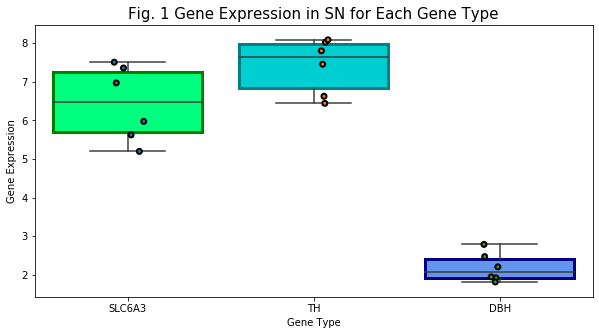

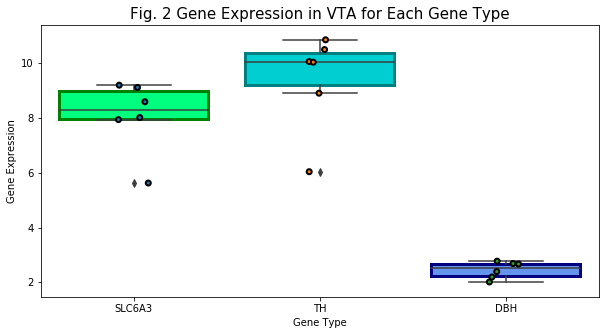

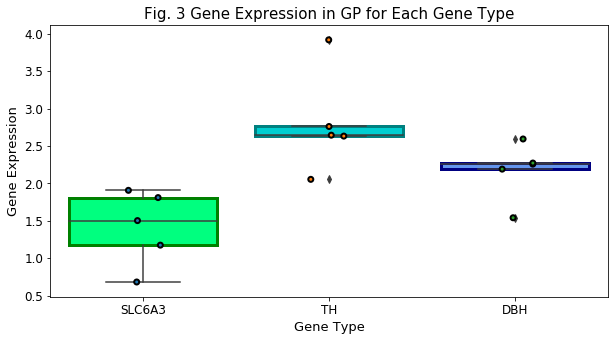

In [34]:
#SN boxplot
plt.figure(figsize=(10,5)) #Set a figure size
#Create a dictionary for SN gene expression
SN_dict = {'Gene Expression':(7.357163, 5.197662, 6.971675, 5.974450, 7.507700, 5.624600,
                                  7.802575, 6.441825, 8.025650, 6.625200, 8.087350, 7.456750,
                                  2.471350, 2.787975, 1.919700, 1.814700, 1.945900, 2.205800),
           'Gene Type':('SLC6A3','SLC6A3','SLC6A3','SLC6A3','SLC6A3','SLC6A3',
                          'TH','TH','TH','TH','TH','TH',
                          'DBH','DBH','DBH','DBH','DBH','DBH')}
#Create a dataframe for SN gene expression using the dictionary
SN_plot_df = pd.DataFrame(SN_dict)
#Create SN gene boxplots
SN_boxplot = sns.boxplot(x = 'Gene Type', y = 'Gene Expression', data = SN_plot_df)
#Adjust size of xlabel, ylabel, and ticks
sns.stripplot(x='Gene Type', y='Gene Expression',data=SN_plot_df, jitter=True,linewidth=2,edgecolor='black')

#VTA boxplot
plt.figure(figsize=(10,5)) #Set a figure size
#Create a dictionary for VTA gene expression
VTA_dict = {'Gene Expression':(9.19785,7.93930,8.01505,5.62445,8.59265,9.11405,
                              10.8541,8.9048,10.0585,6.0374,10.0361,10.4979,
                              2.1915,2.3882,2.7712,2.0114,2.6673,2.6857),
            'Gene Type':('SLC6A3','SLC6A3','SLC6A3','SLC6A3','SLC6A3','SLC6A3',
                          'TH','TH','TH','TH','TH','TH',
                          'DBH','DBH','DBH','DBH','DBH','DBH')}
#Create a dataframe for VTA gene expression using the dictionary
VTA_plot_df = pd.DataFrame(VTA_dict)
#Create VTA gene boxplots
VTA_boxplot = sns.boxplot(x = 'Gene Type', y = 'Gene Expression', data = VTA_plot_df)
#Adjust size of xlabel, ylabel, and ticks
sns.stripplot(x='Gene Type', y='Gene Expression',data=VTA_plot_df, jitter=True,linewidth=2,edgecolor='black')

#GP boxplot
plt.figure(figsize=(10,5)) #Set a figure size
#Create a dictionary for VTA gene expression
GP_dict = {'Gene Expression':(1.50190,1.80940,1.17355,1.90645,0.68080,
                             3.91890,2.64395,2.05335,2.63165,2.76010,
                             2.25720,2.27135,1.53975,2.19005,2.59310),
           'Gene Type':('SLC6A3','SLC6A3','SLC6A3','SLC6A3','SLC6A3',
                          'TH','TH','TH','TH','TH',
                          'DBH','DBH','DBH','DBH','DBH')}
#Create a dataframe for GP gene expression using the dictionary
GP_plot_df = pd.DataFrame(GP_dict)
#Create GP gene boxplots
GP_boxplot = sns.boxplot(x = 'Gene Type', y = 'Gene Expression', data = GP_plot_df)
#Adjust size of xlabel, ylabel, and ticks
sns.stripplot(x='Gene Type', y='Gene Expression',data=GP_plot_df, jitter=True,linewidth=2,edgecolor='black')

#Plot the boxplots 
boxplot_list = [SN_boxplot,VTA_boxplot,GP_boxplot]
gene_types = ['SLC6A3','TH','DBH']
box_facecolors = ['springgreen', 'darkturquoise', 'cornflowerblue']
box_edgecolors = ['g','teal','navy']
plt_titles_list = ['Fig. 1 Gene Expression in SN for Each Gene Type','Fig. 2 Gene Expression in VTA for Each Gene Type','Fig. 3 Gene Expression in GP for Each Gene Type']
box_facecolor_dict = dict(zip(gene_types,box_facecolors))
box_edgecolor_dict = dict(zip(gene_types,box_edgecolors))

for x in boxplot_list:
    for i in range(0,3):
        mybox = x.artists[i]
        mybox.set_facecolor(box_facecolor_dict[gene_types[i]])
        mybox.set_edgecolor(box_edgecolor_dict[gene_types[i]])
        mybox.set_linewidth(3)
    plt.xlabel("Gene Type", fontsize=13)
    plt.ylabel("Gene Expression", fontsize=13)
    plt.tick_params('both', labelsize='12')
    boxplot_list[0].set_title(plt_titles_list[0], fontsize = 15)
    boxplot_list[1].set_title(plt_titles_list[1], fontsize = 15)
    boxplot_list[2].set_title(plt_titles_list[2], fontsize = 15)

        

Fig. 1 Gene Expression in SNr: The graph visualizes the average distribution of gene expression values in the SNr for each of the three gene types in control cases. There is a narrower range of gene expression values for *DBH* gene than for *SLC6A3* gene and *TH* gene, which suggests the gene expression values of *DBH* in SN is more representative than that of *SLC6A3* and *TH*. *SLC6A3* and *TH* are more expressed than *DBH* in the SN.
		
Fig. 2 Gene Expression in VTA: The graph visualizes the average distribution of gene expression values in the VTA for each of the three gene types in control cases. The range of gene expression values for the three genes appear relatively narrow in comparison to the ranges in Fig. 1, which suggests the expression values of the genes in the VTA are representative. *SLC6A3* and *TH* are more expressed than *DBH* in the VTA.

Fig. 3 Gene Expression in GPe: The graph visualizes the average distribution of gene expression values in the GPe for each of the three gene types in control cases. The range of gene expression values for *TH* and *DBH* are relatively narrow compared to that of *SLC6A3*, which suggests the expression values of those two genes in the GPe are more representative than that of *SLC6A3*. *TH* and *DBH* are more expressed than *SLC6A3* in the GPe.

Overall, the data suggests that the *SLC6A3* gene and *TH* gene are more highly expressed in the SNr and VTA and more lowly expressed in the GPe than the *DBH* gene. It also suggests that *DBH* is expressed at low levels in all three regions.


# Mouse Connectivity Data Wrangling


Using the Allen Brain Atlas Mouse Connectivity data, we were able to pull key structure information to understand the neural circuits involved in Parkinsons disease. Specifically, we filtered for three essential brain regions involved in the pathology of the disease: Substantia nigra reticular part (SNr), Ventral tegmental area (VTA), and Globus pallidus external (GPe). To better understand the neurodegenerative aspect of Parkinsons, regarding the degeneration of dopaminergic neurons, we studied specific experiments that utilized the Cre/Lox genetic engineering method. We chose the transgenic line Slc6a3-Cre, Th-IRES-CreER, Th-Cre-FI172, and Dbh-Cre_KH212 and the certain cells that expressed the gene associated with it. Using the Allen toolkit packages, we could then anlayze which brain regions these regions projected too, comparing the Cre line to its wildtype.  

## Gather Essential Toolkits

In [35]:
#Import MouseConnectivityCache and convert it to mcc
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
mcc = MouseConnectivityCache()
#Gather all the experiments with Cre and WildType
all_experiments = mcc.get_experiments(dataframe=True)
#Toolkits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import requests

In [36]:
#Grab the StructureTree instance
structure_tree = mcc.get_structure_tree()

In [37]:
#Import Onto package
from allensdk.api.queries.ontologies_api import OntologiesApi
oapi = OntologiesApi()
#Get the ids of all the structure sets in the tree
structure_set_ids = structure_tree.get_structure_sets()
#Query the API for information on those structure sets
Main_structure_df = pd.DataFrame(oapi.get_structure_sets(structure_set_ids))

# Pulling our Desired Brain Regions 

First we have to understand what structures are available to us and then filter for our regions we want to study. Using the Allan Atlas structure tree, we could convert it into a Panda data frame and then filter for the regions we wanted.

In [38]:
#A list of all the unique structures
summary_structures = structure_tree.get_structures_by_set_id([167587189])
summary_structures_df = pd.DataFrame(summary_structures)
#Getting all structure that have experiments and list the columns
list(summary_structures_df.columns)
#Gather all the unique structure names
structure_name = summary_structures_df['name'].unique()
structure_name

array(['Frontal pole, cerebral cortex', 'Primary motor area',
       'Secondary motor area', 'Primary somatosensory area, nose',
       'Primary somatosensory area, barrel field',
       'Primary somatosensory area, lower limb',
       'Primary somatosensory area, mouth',
       'Primary somatosensory area, upper limb',
       'Primary somatosensory area, trunk',
       'Primary somatosensory area, unassigned',
       'Supplemental somatosensory area', 'Gustatory areas',
       'Visceral area', 'Dorsal auditory area', 'Primary auditory area',
       'Posterior auditory area', 'Ventral auditory area',
       'Anterolateral visual area', 'Anteromedial visual area',
       'Lateral visual area', 'Primary visual area',
       'Posterolateral visual area', 'posteromedial visual area',
       'Laterointermediate area', 'Postrhinal area',
       'Anterior cingulate area, dorsal part',
       'Anterior cingulate area, ventral part', 'Prelimbic area',
       'Infralimbic area', 'Orbital area, l

After finding our structures (SNr, VTA, GPe) we then needed to fetch key attributes about them within the data set. Attributes we took note of were their acronym, ID #, and offical name [34][1][3].

In [39]:
#Filter for Substantia nigra ID
SubStanNi_df = summary_structures_df[summary_structures_df['name'] == 'Substantia nigra, reticular part']
print('The ID for Snr is 381')
SubStanNi_df.head()

The ID for Snr is 381


,acronym,graph_id,graph_order,id,name,structure_id_path,structure_set_ids,rgb_triplet
194,SNr,1,822,381,"Substantia nigra, reticular part","[997, 8, 343, 313, 323, 381]","[112905828, 691663206, 687527945, 12, 68815236...","[255, 144, 255]"


In [40]:
#Filter for VTA ID
VTA_df = summary_structures_df[summary_structures_df['name'] == 'Ventral tegmental area']
print('The ID for VTA is 749')
VTA_df.head()

The ID for VTA is 749


,acronym,graph_id,graph_order,id,name,structure_id_path,structure_set_ids,rgb_triplet
195,VTA,1,823,749,Ventral tegmental area,"[997, 8, 343, 313, 323, 749]","[112905828, 691663206, 687527945, 10, 12, 6881...","[255, 144, 255]"


In [41]:
#Filter of Golbus pallidus (External Segment) ID
GlobPall_df = summary_structures_df[summary_structures_df['name'] == 'Globus pallidus, external segment']
print('The ID for GPe is 1022')
GlobPall_df.head()

The ID for GPe is 1022


,acronym,graph_id,graph_order,id,name,structure_id_path,structure_set_ids,rgb_triplet
90,GPe,1,610,1022,"Globus pallidus, external segment","[997, 8, 567, 623, 803, 818, 1022]","[112905828, 691663206, 687527945, 688152362, 1...","[133, 153, 204]"


# Filtering for Transgenic Lines and Experiments 

After establishing the necessary attributes of our desired regions, we then needed to look if there were experiments in our regions which used the transgenic lines we wished to study. Initally, we wanted to filter for three transgenic lines: Slc6a3-Cre [30], Th-IRES-CreER[6] and Dbh-Cre_KH212[13]. Unfortunately, the Substantia Nigra and the Globus pallidus external lacked all three transgenic lines we hoped to analyze. For those regions, we were able to pull its wild type for its projection data.  

Below, we filtered through specific transgenic lines based on our regions using the "get_structure" and "get_experiments" method. Once we established there were viable experiments in the regions, we then used the ProjectionStructureUnionizes API method to retrieve the density of projecting signal and other attributes like volume of projecting signal. 


##  SNr Slc6a3-Cre Experiments

In [42]:
#We filter out the Substantia nigra, reticular part
SNr = structure_tree.get_structures_by_name(['Substantia nigra, reticular part'])[0]

#Determine there are Cre + experiments with the SNr through cre=True
Cre_SNr_experiments = mcc.get_experiments( cre=True, injection_structure_ids=[SNr['id']])

#Filter for Slc6a3Cre cre line and see if there are any experiments  
Slc6a3Cre_SNr_experiments = mcc.get_experiments(cre=[ 'Slc6a3-Cre' ], 
                                                injection_structure_ids=[SNr['id']])
print( 'Slc6a3Cre Substantia Nigra experiments =',  len(Slc6a3Cre_SNr_experiments))
print('Since we have 0 Slc6a3Cre Substantia Nigra experiments') 
print('we wont be able to analyze projection density through unionization')

Slc6a3Cre Substantia Nigra experiments = 0
Since we have 0 Slc6a3Cre Substantia Nigra experiments
we wont be able to analyze projection density through unionization


##  VTA Slc6a3-Cre Experiments 

In [43]:
#We wilter out VTA
VTA = structure_tree.get_structures_by_name(['Ventral tegmental area'])[0]

#Determine there are Cre + experiments with the VTA through cre=True
Cre_VTA_experiments = mcc.get_experiments( cre=True, injection_structure_ids=[VTA['id']])

#Filter for Slc6a3Cre cre line 
Slc6a3Cre_VTA_experiments = mcc.get_experiments(cre=[ 'Slc6a3-Cre' ], 
                                                injection_structure_ids=[VTA['id']])
print("Slc6a3Cre Substantia Nigra experiments =", len(Slc6a3Cre_VTA_experiments))

#The ProjectionStructureUnionizes API data tells you how much signal there was in a given structure and experiment. 
#It contains the density of projecting signal, volume of projecting signal, and other information. 
#MouseConnectivityCache provides methods for querying and storing this data. 
Slc6a3Cre_VTA_structure_unionizes = mcc.get_structure_unionizes([ e['id'] for e in Slc6a3Cre_VTA_experiments ], 
                                                  structure_ids=[VTA['id']],
                                                  include_descendants=True)
#After unionization we can place it in a data frame and see out data 
Slc6a3Cre_VTA_structure_unionizes_df = pd.DataFrame(Slc6a3Cre_VTA_structure_unionizes)
Slc6a3Cre_VTA_structure_unionizes_df

Slc6a3Cre Substantia Nigra experiments = 2


,experiment_id,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
0,160540751,1,629638076,False,0.488787,8170,5110,5180,0.006089,0.001556,1.272406,817.893738,0.000368,749,4.466523e+10,192878096.0,2.454193e+08,3.000626e+05,0.236276
1,160540751,2,629637376,False,0.993777,8100,5050,6330,0.285383,0.101904,238.224182,2337.742188,0.017227,749,8.990343e+10,138000416.0,3.287504e+10,1.406273e+07,0.169051
2,160540751,3,629639076,False,0.993777,8100,5050,6330,0.291472,0.043408,100.098540,2305.989992,0.017594,749,1.345687e+11,330878512.0,3.312046e+10,1.436279e+07,0.405326
3,160540751,2,629637375,True,1.000000,8590,4750,6150,0.637691,0.572606,4277.937500,7470.998047,0.038494,749,2.564399e+11,54877676.0,2.347633e+11,3.142328e+07,0.067225
4,160540751,3,629639075,True,1.000000,8590,4750,6150,0.637691,0.572606,4277.937276,7470.998277,0.038494,749,2.564399e+11,54877676.0,2.347633e+11,3.142328e+07,0.067225
5,160539283,1,629653159,False,0.607899,7980,5410,4670,0.001614,0.001636,1.472784,900.131165,0.000387,749,3.657702e+10,192878096.0,2.840678e+08,3.155849e+05,0.236276
6,160539283,3,629654158,True,1.000000,8490,5210,6740,0.426365,0.823310,6577.217294,7988.745898,0.102135,749,6.815038e+11,101268328.0,6.660638e+11,8.337526e+07,0.124054
7,160539283,3,629654159,False,0.999967,8090,5100,6420,0.132542,0.091106,289.974623,3182.826659,0.031750,749,1.562242e+11,284487864.0,8.249426e+10,2.591855e+07,0.348498
8,160539283,2,629652451,False,0.999967,8090,5100,6420,0.130929,0.279479,897.395508,3210.963379,0.031364,749,1.196472e+11,91609768.0,8.221019e+10,2.560297e+07,0.112222
9,160539283,2,629652450,True,1.000000,8490,5210,6740,0.426365,0.823310,6577.217285,7988.746094,0.102135,749,6.815038e+11,101268328.0,6.660638e+11,8.337526e+07,0.124054


##  GPe Slc6a3-Cre Experiments

In [44]:
#Filter for GPe
GPe = structure_tree.get_structures_by_name(['Globus pallidus, external segment'])[0]
#See if there are GPe Cre + experiments
Cre_GPe_experiments = mcc.get_experiments( cre=True, injection_structure_ids=[GPe['id']])

#Filter for Slc6a3Cre cre line 
Slc6a3Cre_GPe_experiments = mcc.get_experiments(cre=[ 'Slc6a3-Cre' ], 
                                                injection_structure_ids=[GPe['id']])
print("Slc6a3Cre GPe experiments =", len(Slc6a3Cre_GPe_experiments))
print('Since we have 0 Slc6a3Cre GPe experiments') 
print('we wont be able to analyze projection density through unionization')

Slc6a3Cre GPe experiments = 0
Since we have 0 Slc6a3Cre GPe experiments
we wont be able to analyze projection density through unionization


 ## SNr Th-IRES-CreER Experiments

In [45]:
SNr = structure_tree.get_structures_by_name(['Substantia nigra, reticular part'])[0]
Cre_SNr_experiments = mcc.get_experiments( cre=True, injection_structure_ids=[SNr['id']])

#Filter for Th-IRES-CreER cre line 
Th_IRES_CreER_SNr_experiments = mcc.get_experiments(cre=[ 'Th-IRES-CreER' ], 
                                                injection_structure_ids=[SNr['id']])
print("Th-IRES-CreER SNr experiments =", len(Th_IRES_CreER_SNr_experiments))
print('Since we have 0 Th-IRES-CreER SNr experiments') 
print('we wont be able to analyze projection density through unionization')

Th-IRES-CreER SNr experiments = 0
Since we have 0 Th-IRES-CreER SNr experiments
we wont be able to analyze projection density through unionization


##  VTA Th-IRES-CreER Experiments

In [46]:
VTA = structure_tree.get_structures_by_name(['Ventral tegmental area'])[0]
Cre_VTA_experiments = mcc.get_experiments( cre=True, injection_structure_ids=[VTA['id']])

#Filter for Th-IRES-CreER cre line 
Th_IRES_CreER_VTA_experiments = mcc.get_experiments(cre=[ 'Th-IRES-CreER' ], 
                                                injection_structure_ids=[VTA['id']])
print("Th-IRES-CreER VTA experiments =", len(Th_IRES_CreER_VTA_experiments))

#The ProjectionStructureUnionizes API data tells you how much signal there was in a given structure and experiment. 
#It contains the density of projecting signal, volume of projecting signal, and other information. 
#MouseConnectivityCache provides methods for querying and storing this data. 
TH_IRES_Cre_VTA_structure_unionizes = mcc.get_structure_unionizes([ e['id'] for e in Th_IRES_CreER_VTA_experiments ], 
                                                  structure_ids=[VTA['id']],
                                                  include_descendants=True)

print("%d VTA structure unionizes" % len(TH_IRES_Cre_VTA_structure_unionizes))
TH_IRES_Cre_VTA_structure_unionizes_df = pd.DataFrame(TH_IRES_Cre_VTA_structure_unionizes)
TH_IRES_Cre_VTA_structure_unionizes_df

Th-IRES-CreER VTA experiments = 1
6 VTA structure unionizes


,experiment_id,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
0,156314762,1,628386699,True,0.998237,8530,5170,5340,0.146655,0.267712,636.897095,2379.041748,0.019929,749,6.906879e+10,60769468.0,3.870390e+10,16268692.0,0.074443
1,156314762,3,628390605,False,0.895173,8320,5170,6070,0.185569,0.079684,68.043855,853.918783,0.025217,749,9.053680e+10,258338816.0,1.757837e+10,20585528.0,0.316465
2,156314762,3,628390603,True,1.000000,8500,5230,6160,0.376054,0.327400,862.507578,2634.413785,0.051103,749,1.695132e+11,127417372.0,1.098984e+11,41716472.0,0.156086
3,156314762,2,628383846,True,1.000000,8500,5230,6160,0.229400,0.381824,1068.218872,2797.672363,0.031174,749,1.004444e+11,66647904.0,7.119455e+10,25447780.0,0.081644
4,156314762,2,628383852,False,0.895173,8320,5170,6070,0.100543,0.088358,81.959137,927.577881,0.013663,749,4.627873e+10,126230192.0,1.034572e+10,11153476.0,0.154632
5,156314762,1,628386703,False,0.789031,8340,5190,5280,0.085025,0.071396,54.747761,766.816284,0.011554,749,4.425807e+10,132108624.0,7.232651e+09,9432052.0,0.161833


##  GPe Th-IRES-CreER Experiments

In [47]:
GPe = structure_tree.get_structures_by_name(['Globus pallidus, external segment'])[0]
TH_IRES_Cre_GPe_experiments = mcc.get_experiments( cre=True, injection_structure_ids=[GPe['id']])

#Filter for Th-IRES-CreER cre line 
TH_IRES_CreER_GPe_experiments = mcc.get_experiments(cre=[ 'Th-IRES-CreER' ], 
                                                injection_structure_ids=[GPe['id']])
print("TH_IRES_CreER GPe experiments =" , len(TH_IRES_CreER_GPe_experiments))
print('Since we have 0 Th-IRES-CreER GPe experiments') 
print('we wont be able to analyze projection density through unionization')

TH_IRES_CreER GPe experiments = 0
Since we have 0 Th-IRES-CreER GPe experiments
we wont be able to analyze projection density through unionization


 ## SNr Th-Cre-FI172 Experiments

In [48]:
SNr = structure_tree.get_structures_by_name(['Substantia nigra, reticular part'])[0]
Cre_SNr_experiments = mcc.get_experiments( cre=True, injection_structure_ids=[SNr['id']])

#Filter for Th-Cre_FI172 cre line 
Th_Cre_FI172_SNr_experiments = mcc.get_experiments(cre=[ 'Th-Cre_FI172' ], 
                                                injection_structure_ids=[SNr['id']])
print("Th_Cre_FI172 SNr experiments =" , len(Th_Cre_FI172_SNr_experiments))
print('Since we have 0 Th-Cre_FI172 SNr experiments') 
print('we wont be able to analyze projection density through unionization')

Th_Cre_FI172 SNr experiments = 0
Since we have 0 Th-Cre_FI172 SNr experiments
we wont be able to analyze projection density through unionization


##  VTA Th-Cre-FI172 Experiments

In [49]:
VTA = structure_tree.get_structures_by_name(['Ventral tegmental area'])[0]
Cre_VTA_experiments = mcc.get_experiments( cre=True, injection_structure_ids=[VTA['id']])

#Filter for Th-Cre_FI172 cre line 
Th_Cre_FI172_VTA_experiments = mcc.get_experiments(cre=[ 'Th-Cre_FI172' ], 
                                                injection_structure_ids=[VTA['id']])
print("Th_Cre_FI172 VTA experiments =" , len(Th_Cre_FI172_VTA_experiments))

#The ProjectionStructureUnionizes API data tells you how much signal there was in a given structure and experiment. 
#It contains the density of projecting signal, volume of projecting signal, and other information. 
#MouseConnectivityCache provides methods for querying and storing this data. 
Th_Cre_FI172_VTA_structure_unionizes = mcc.get_structure_unionizes([ e['id'] for e in Th_Cre_FI172_VTA_experiments ], 
                                                  structure_ids=[VTA['id']],
                                                  include_descendants=True)

Th_Cre_FI172_VTA_structure_unionizes_df = pd.DataFrame(Th_Cre_FI172_VTA_structure_unionizes)
Th_Cre_FI172_VTA_structure_unionizes_df

Th_Cre_FI172 VTA experiments = 1


,experiment_id,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
0,304337288,3,635988113,False,0.677555,8590,4910,6510,0.907734,0.020948,9.162405,437.384958,0.009635,749,3.137544e+10,375478816.0,3.440289e+09,7.865586e+06,0.459962
1,304337288,3,635988112,True,0.997808,8410,4830,6180,0.331845,0.279786,772.647338,2761.563351,0.003522,749,1.016586e+10,10277374.0,7.940786e+09,2.875468e+06,0.012590
2,304337288,2,635985125,True,0.997808,8410,4830,6180,0.331845,0.279786,772.647339,2761.563232,0.003522,749,1.016586e+10,10277374.0,7.940786e+09,2.875468e+06,0.012590
3,304337288,2,635985127,False,0.677555,8590,4910,6510,0.900365,0.042726,18.723707,438.231018,0.009557,749,1.908059e+10,182600720.0,3.418962e+09,7.801736e+06,0.223686
4,304337288,1,635986457,False,0.456638,8690,5060,5070,0.007369,0.000331,0.110571,334.008209,0.000078,749,1.229485e+10,192878096.0,2.132667e+07,6.385073e+04,0.236276


##  GPi Th-Cre-FI172 Experiments

In [50]:
GPe = structure_tree.get_structures_by_name(['Globus pallidus, external segment'])[0]
TH_Cre_FI172_GPe_experiments = mcc.get_experiments( cre=True, injection_structure_ids=[GPe['id']])

#Filter for Th-Cre_FI172  cre line 
Th_Cre_FI172_GPe_experiments = mcc.get_experiments(cre=[ 'Th-Cre_FI172' ], 
                                                injection_structure_ids=[GPe['id']])
print("Th-Cre_FI172 GPe experiments" , len(Th_Cre_FI172_GPe_experiments))
print('Since we have 0 Th-Cre_FI172 GPe experiments') 
print('we wont be able to analyze projection density through unionization')

Th-Cre_FI172 GPe experiments 0
Since we have 0 Th-Cre_FI172 GPe experiments
we wont be able to analyze projection density through unionization


##  SNr Dbh-Cre_KH212 Experiments

In [51]:
SNr = structure_tree.get_structures_by_name(['Substantia nigra, reticular part'])[0]
Cre_SNr_experiments = mcc.get_experiments( cre=True, injection_structure_ids=[SNr['id']])

#Filter for Dbh-Cre_KH212 cre line 
Dbh_Cre_KH212_SNr_experiments = mcc.get_experiments(cre=[ 'Dbh-Cre_KH212' ], 
                                                injection_structure_ids=[SNr['id']])
print("Dbh_Cre_KH212 SNr experiments =" , len(Dbh_Cre_KH212_SNr_experiments))
print('Since we have 0 Dbh-Cre_KH212 SNr experiments') 
print('we wont be able to analyze projection density through unionization')

Dbh_Cre_KH212 SNr experiments = 0
Since we have 0 Dbh-Cre_KH212 SNr experiments
we wont be able to analyze projection density through unionization


 ## VTA Dbh-Cre_KH212 Experiments

In [52]:
VTA = structure_tree.get_structures_by_name(['Ventral tegmental area'])[0]
Cre_VTA_experiments = mcc.get_experiments( cre=True, injection_structure_ids=[VTA['id']])

#Filter for Dbh-Cre_KH212 cre line 
Dbh_Cre_KH212_VTA_experiments = mcc.get_experiments(cre=[ 'Dbh-Cre_KH212' ], 
                                                injection_structure_ids=[VTA['id']])
print("Dbh_Cre_KH212 VTA experiments =" , len(Dbh_Cre_KH212_VTA_experiments))
print('Since we have 0 Dbh-Cre_KH212 VTA experiments') 
print('we wont be able to analyze projection density through unionization')

Dbh_Cre_KH212 VTA experiments = 0
Since we have 0 Dbh-Cre_KH212 VTA experiments
we wont be able to analyze projection density through unionization


##  GPe Dbh-Cre_KH212 Experiments

In [53]:
GPe = structure_tree.get_structures_by_name(['Globus pallidus, external segment'])[0]
TH_Cre_FI172_GPe_experiments = mcc.get_experiments( cre=True, injection_structure_ids=[GPe['id']])

#Filter for Dbh-Cre_KH212  cre line 
Dbh_Cre_KH212_GPe_experiments = mcc.get_experiments(cre=[ 'Dbh-Cre_KH212' ], 
                                                injection_structure_ids=[GPe['id']])
print("Dbh_Cre_KH212 GPe experiments =" , len(Dbh_Cre_KH212_GPe_experiments))
print('Since we have 0 Dbh-Cre_KH212 GPe experiments') 
print('we wont be able to analyze projection density through unionization')

Dbh_Cre_KH212 GPe experiments = 0
Since we have 0 Dbh-Cre_KH212 GPe experiments
we wont be able to analyze projection density through unionization


## SNr Wild Type Experiments

In [54]:
SNr = structure_tree.get_structures_by_name(['Substantia nigra, reticular part'])[0]
#We filter the WildType by setting cre=False
WT_SNr_experiments = mcc.get_experiments( cre=False, injection_structure_ids=[SNr['id']])

print("WT SSNICP experiments =" , len(WT_SNr_experiments))
 

#The ProjectionStructureUnionizes API data tells you how much signal there was in a given structure and experiment. 
#It contains the density of projecting signal, volume of projecting signal, and other information. 
#MouseConnectivityCache provides methods for querying and storing this data. 
WT_SNr_structure_unionizes = mcc.get_structure_unionizes([ e['id'] for e in WT_SNr_experiments ], 
                                                  structure_ids=[SNr['id']],
                                                  include_descendants=True)

WT_SNr_structure_unionizes_df = pd.DataFrame(WT_SNr_structure_unionizes)
WT_SNr_structure_unionizes_df

WT SSNICP experiments = 3


,experiment_id,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
0,158914182,2,628596947,True,1.000000,8460,5540,6880,0.288512,0.874839,4706.666992,5380.039062,0.155556,381,6.956226e+11,1.451523e+08,6.831835e+11,1.269849e+08,0.177812
1,158914182,3,628602495,True,1.000000,8460,5540,6880,0.288512,0.874839,4706.667148,5380.038879,0.155556,381,6.956226e+11,1.451523e+08,6.831835e+11,1.269849e+08,0.177812
2,158914182,2,628596950,False,0.996679,8880,5370,6880,0.138196,0.110123,111.582924,1013.258362,0.074511,381,1.821103e+11,5.523369e+08,6.163137e+10,6.082493e+07,0.676613
3,158914182,3,628602497,False,0.996679,8880,5370,6880,0.140228,0.049382,49.614463,1004.699012,0.075606,381,3.001119e+11,1.249826e+09,6.200945e+10,6.171943e+07,1.531037
4,158914182,1,628600455,False,0.368926,8360,5080,4390,0.002032,0.001282,0.542067,422.677277,0.001096,381,1.180016e+11,6.974892e+08,3.780860e+08,8.945028e+05,0.854424
5,100141993,2,631730667,True,1.000000,8660,4990,7350,0.946117,0.986285,4423.732910,4485.248535,0.213580,381,7.828359e+11,1.767756e+08,7.820080e+11,1.743511e+08,0.216550
6,100141993,2,631730668,False,1.000000,8910,4630,7320,0.667078,0.236079,298.250336,1263.348877,0.150589,381,2.120673e+11,5.207136e+08,1.553030e+11,1.229296e+08,0.637874
7,100141993,3,631732361,True,1.000000,8660,4990,7350,0.946117,0.986285,4423.733044,4485.248297,0.213580,381,7.828359e+11,1.767756e+08,7.820080e+11,1.743511e+08,0.216550
8,100141993,1,631731818,False,0.627405,8680,4530,3780,0.003441,0.000909,0.195561,215.087982,0.000777,381,4.915918e+10,6.974892e+08,1.364020e+08,6.341682e+05,0.854424
9,100141993,3,631732362,False,1.000000,8910,4630,7320,0.670520,0.101431,127.597321,1257.968921,0.151366,381,2.612265e+11,1.218203e+09,1.554394e+11,1.235638e+08,1.492298


## VTA Wild Type Experiments

In [55]:
VTA = structure_tree.get_structures_by_name(['Ventral tegmental area'])[0]
WT_VTA_experiments = mcc.get_experiments( cre=False, injection_structure_ids=[VTA['id']])

print("WildType VTA experiments =" , len(WT_VTA_experiments))

#Since ther are no Dbh-Cre_KH212 experiments for VTA we cant unionize the data 

#The ProjectionStructureUnionizes API data tells you how much signal there was in a given structure and experiment. 
#It contains the density of projecting signal, volume of projecting signal, and other information. 
#MouseConnectivityCache provides methods for querying and storing this data. 
WT_VTA_structure_unionizes = mcc.get_structure_unionizes([ e['id'] for e in WT_VTA_experiments ], 
                                                 structure_ids=[VTA['id']],
                                                 include_descendants=True)

WT_VTA_structure_unionizes_df = pd.DataFrame(WT_VTA_structure_unionizes)
WT_VTA_structure_unionizes_df

WildType VTA experiments = 2


,experiment_id,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
0,127796728,3,633469318,False,0.728139,8570,5140,6230,0.197367,0.027603,13.440378,486.916961,0.011852,749,6.006990e+10,350496992.0,4.710812e+09,9.674775e+06,0.429359
1,127796728,1,633465741,False,0.502872,8490,4870,5300,0.016920,0.004300,1.393459,324.043671,0.001016,749,2.838710e+10,192878096.0,2.687677e+08,8.294182e+05,0.236276
2,127796728,3,633469315,True,0.933187,8310,4970,6070,0.119656,0.166353,230.219184,1383.923345,0.007185,749,1.736365e+10,35259200.0,8.117344e+09,5.865458e+06,0.043193
3,127796728,2,633464974,True,0.933187,8310,4970,6070,0.119656,0.166353,230.219177,1383.923340,0.007185,749,1.736365e+10,35259200.0,8.117344e+09,5.865458e+06,0.043193
4,127796728,2,633464975,False,0.728139,8570,5140,6230,0.180447,0.056119,28.182182,502.189392,0.010836,749,3.168280e+10,157618896.0,4.442044e+09,8.845357e+06,0.193083
5,120572378,1,633581314,True,1.000000,8410,4850,5220,0.086409,0.724656,2258.901367,3117.205811,0.057622,749,1.617096e+11,64911048.0,1.466277e+11,4.703817e+07,0.079516
6,120572378,2,633580559,False,0.962823,8170,5370,6190,0.042012,0.129298,146.611267,1133.898071,0.028016,749,7.958389e+10,176878560.0,2.593239e+10,2.287013e+07,0.216676
7,120572378,3,633582471,False,0.997053,8170,5400,5140,0.081383,0.145327,176.200621,1212.446364,0.054270,749,1.537369e+11,304845608.0,5.371399e+10,4.430215e+07,0.373436
8,120572378,3,633582469,True,1.000000,8410,4850,5220,0.097991,0.659288,2012.255631,3052.165406,0.065346,749,1.853973e+11,80910577.0,1.628128e+11,5.334336e+07,0.099115
9,120572378,2,633580558,True,0.999477,8470,5230,6130,0.011583,0.394086,1011.598938,2566.949951,0.007724,749,2.368769e+10,15999529.0,1.618511e+10,6.305190e+06,0.019599


## GPe Wild Type Experiments

In [56]:
GPe = structure_tree.get_structures_by_name(['Globus pallidus, external segment'])[0]
WT_GPe_experiments = mcc.get_experiments( cre=False, injection_structure_ids=[GPe['id']])

print("WildType GPe experiments =" , len(WT_GPe_experiments))

#The ProjectionStructureUnionizes API data tells you how much signal there was in a given structure and experiment. 
#It contains the density of projecting signal, volume of projecting signal, and other information. 
#MouseConnectivityCache provides methods for querying and storing this data. 
WT_GPe_structure_unionizes = mcc.get_structure_unionizes([ e['id'] for e in WT_GPe_experiments ], 
                                                  structure_ids=[GPe['id']],
                                                  include_descendants=True)


WT_GPe_structure_unionizes_df = pd.DataFrame(WT_GPe_structure_unionizes)
WT_GPe_structure_unionizes_df

WildType GPe experiments = 1


,experiment_id,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
0,158373958,2,631310116,True,1.000000,5700,4890,7220,0.519083,0.577394,1853.540161,3210.180420,0.046884,1022,1.323617e+11,6.628467e+07,1.228613e+11,38272396.0,0.081199
1,158373958,3,631313432,True,1.000000,5700,4890,7220,0.519083,0.577394,1853.540101,3210.180457,0.046884,1022,1.323617e+11,6.628467e+07,1.228613e+11,38272396.0,0.081199
2,158373958,3,631313435,False,0.997359,6170,4880,7740,0.568310,0.031222,18.780625,601.511814,0.051330,1022,1.611685e+11,1.342050e+09,2.520453e+10,41901972.0,1.644011
3,158373958,1,631310396,False,0.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1022,6.143735e+10,7.041672e+08,0.000000e+00,0.0,0.862605
4,158373958,2,631310117,False,0.997359,6170,4880,7740,0.568310,0.065689,39.512814,601.511841,0.051330,1022,9.973117e+10,6.378825e+08,2.520453e+10,41901972.0,0.781406


# Mouse Connectivity Data Visualization

## Graphs of Projection Density Data for the Top 3 Projected Brain Regions

Since we now have the data on the available experiments in each brain region for each gene type, we want to plot the projection density values onto a boxplot to visualize the data's mean and spread. 

We first called the experimental data for regions and genes that had experiments and created three boxplots based on the Cre-line experiments and three boxplots for the Wild Type experiments, one for each of the three brain regions of focus. 



## Experiment Requests

In [57]:
#VTA SLC6A3 experiments 
e1_VTA_SLC6A3 = requests.get('http://api.brain-map.org/api/v2/data/ProjectionStructureUnionize/query.xml?criteria=[section_data_set_id$eq160540751],[is_injection$eqfalse]&num_rows=5000&include=structure')
e2_VTA_SLC6A3 = requests.get('http://api.brain-map.org/api/v2/data/ProjectionStructureUnionize/query.xml?criteria=[section_data_set_id$eq160539283],[is_injection$eqfalse]&num_rows=5000&include=structure')
#VTA Th-IRES-CreER experiments
e1_VTA_Th_IRES_CreER = requests.get('http://api.brain-map.org/api/v2/data/ProjectionStructureUnionize/query.xml?criteria=[section_data_set_id$eq156314762],[is_injection$eqfalse]&num_rows=5000&include=structure')
#VTA Th-Cre-FI172 experiments
e1_VTA_Th_Cre_FI172 = requests.get('http://api.brain-map.org/api/v2/data/ProjectionStructureUnionize/query.xml?criteria=[section_data_set_id$eq304337288],[is_injection$eqfalse]&num_rows=5000&include=structure')
#SNr WT experiments
e1_SNr_WT = requests.get('http://api.brain-map.org/api/v2/data/ProjectionStructureUnionize/query.xml?criteria=[section_data_set_id$eq158914182],[is_injection$eqfalse]&num_rows=5000&include=structure')
e2_SNr_WT = requests.get('http://api.brain-map.org/api/v2/data/ProjectionStructureUnionize/query.xml?criteria=[section_data_set_id$eq100141993],[is_injection$eqfalse]&num_rows=5000&include=structure')
e3_SNr_WT = requests.get('http://api.brain-map.org/api/v2/data/ProjectionStructureUnionize/query.xml?criteria=[section_data_set_id$eq175263063],[is_injection$eqfalse]&num_rows=5000&include=structure')
#VTA WT experiments
e1_VTA_WT = requests.get('http://api.brain-map.org/api/v2/data/ProjectionStructureUnionize/query.xml?criteria=[section_data_set_id$eq127796728],[is_injection$eqfalse]&num_rows=5000&include=structure')
e2_VTA_WT = requests.get('http://api.brain-map.org/api/v2/data/ProjectionStructureUnionize/query.xml?criteria=[section_data_set_id$eq120572378],[is_injection$eqfalse]&num_rows=5000&include=structure')
#GPe WT experiments
e1_GPe_WT = requests.get('http://api.brain-map.org/api/v2/data/ProjectionStructureUnionize/query.xml?criteria=[section_data_set_id$eq158373958],[is_injection$eqfalse]&num_rows=5000&include=structure')


## VTA Slc6a3-Cre Graph Data

,VTA SLC6A3 Regions,Projection Density
0,Striatum dorsal region,0.002509
1,Striatum dorsal region,0.454389
2,Striatum dorsal region,0.228449
3,Caudoputamen,0.002509
4,Striatum,0.228449
5,Caudoputamen,0.454389
6,Striatum,0.145846
7,Caudoputamen,0.001625
8,Striatum,0.290066


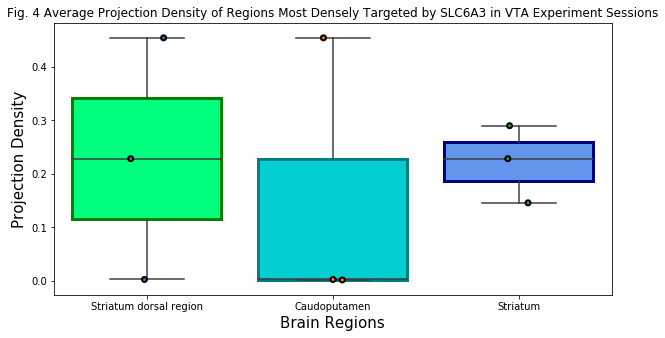

In [58]:
plt.figure(figsize=(10,5))
#Make a list of VTA SLC6A3 data
VTA_SLC6A3_data = [e1_VTA_SLC6A3,e2_VTA_SLC6A3]
#Make empty list for regions with highest projection densities
top = []

#Start for loop with in VTA_SLC6A3_data
for i in VTA_SLC6A3_data:
    clean_data = i.text.split('\n') #Remove unnecessary parts of the strings
    proj_density = [] #Empty list for projection density values
    region_names = [] #Empty list for name of regions 
    #Nestled for loop to remove unnecessary parts of the projection density and safe name strings
    for j in clean_data:
        if 'projection-density' in j: #Call all projection density numbers
            proj_1 = j.split('</')
            proj_2 = proj_1[0].split('>')
            proj_density.append(float(proj_2[1])) #Add the numbers as floats to the list
        if 'safe-name' in j: #Call all names 
            region_name_1 = j.split('</')
            region_name_2 = region_name_1[0].split('>')
            region_names.append(region_name_2[1])
            
data_dict = {'Name':region_names, 'Projection density':proj_density} #Dictionary of Name and Proj density values
data_df = pd.DataFrame(data_dict) #Make dict into df
data_df_sorted = data_df.sort_values(by= 'Projection density',ascending = False) #Organize projection values by descending order
data_df_reset = data_df_sorted.set_index('Name') #Set first column to be Name
top.append(data_df_reset.head()) 
top #Print to know which regions have the highest projection densities

#To narrow down the information for the top three regions being projected to 
#Create empty lists
VTA_SLC6A3_regions = []
VTA_SLC6A3_index = []
VTA_SLC6A3_projdens = []
#Create a for loop to add all the times each region is in the list 
for i in data_df['Name']:
    if i == 'Caudoputamen':
        VTA_SLC6A3_regions.append(i)
    if i == 'Striatum dorsal region':
        VTA_SLC6A3_regions.append(i)
    if i == 'Striatum':
        VTA_SLC6A3_regions.append(i)
#Get all regions' indices
VTA_SLC6A3_index1 = (data_df[data_df['Name']=='Caudoputamen'].index.values.astype(int))[0]
VTA_SLC6A3_index2 = (data_df[data_df['Name']=='Caudoputamen'].index.values.astype(int))[1]
VTA_SLC6A3_index3 = (data_df[data_df['Name']=='Caudoputamen'].index.values.astype(int))[2]
VTA_SLC6A3_index4 = (data_df[data_df['Name']=='Striatum dorsal region'].index.values.astype(int))[0]
VTA_SLC6A3_index5 = (data_df[data_df['Name']=='Striatum dorsal region'].index.values.astype(int))[1]
VTA_SLC6A3_index6 = (data_df[data_df['Name']=='Striatum dorsal region'].index.values.astype(int))[2]
VTA_SLC6A3_index7 = (data_df[data_df['Name']=='Striatum'].index.values.astype(int))[0]
VTA_SLC6A3_index8 = (data_df[data_df['Name']=='Striatum'].index.values.astype(int))[1]
VTA_SLC6A3_index9 = (data_df[data_df['Name']=='Striatum'].index.values.astype(int))[2]
#Create a list of indices
VTA_SLC6A3_index = [VTA_SLC6A3_index1,VTA_SLC6A3_index2,VTA_SLC6A3_index3,VTA_SLC6A3_index4,VTA_SLC6A3_index5,VTA_SLC6A3_index6,VTA_SLC6A3_index7,VTA_SLC6A3_index8,VTA_SLC6A3_index9]
#Create a list of projection densities for those regions
for i in VTA_SLC6A3_index:
    VTA_SLC6A3_projdens.append(data_df['Projection density'][i])

#Create a dataframe of top three regions and their projection values
VTA_SLC6A3_df = pd.DataFrame({'VTA SLC6A3 Regions':VTA_SLC6A3_regions,'Projection Density':VTA_SLC6A3_projdens})
#Create a boxplot of the data
VTA_SLC6A3_boxplot = sns.boxplot(x = 'VTA SLC6A3 Regions', y = 'Projection Density', data = VTA_SLC6A3_df)
sns.stripplot(x='VTA SLC6A3 Regions', y='Projection Density',data=VTA_SLC6A3_df, jitter=True,linewidth=2,edgecolor='black')
#Create boxplot variables and style the boxplots
regions = ['Caudoputamen','Striatum dorsal region','Striatum']
box_facecolors = ['springgreen', 'darkturquoise', 'cornflowerblue'] #Set boxplot face colors
box_edgecolors = ['g','teal','navy'] #Set boxplot edge colors
box_facecolor_dict = dict(zip(regions,box_facecolors))
box_edgecolor_dict = dict(zip(regions,box_edgecolors))
#Create a for loop to style boxplots
for i in range(0,3):
    mybox = VTA_SLC6A3_boxplot.artists[i]
    mybox.set_facecolor(box_facecolor_dict[regions[i]])
    mybox.set_edgecolor(box_edgecolor_dict[regions[i]])
    mybox.set_linewidth(3)
    VTA_SLC6A3_boxplot.set_title('Fig. 4 Average Projection Density of Regions Most Densely Targeted by SLC6A3 in VTA Experiment Sessions', fontsize=12)
    plt.xlabel('Brain Regions', fontsize=15)
    plt.ylabel('Projection Density', fontsize=15)
    plt.tick_params('both', labelsize='10')
VTA_SLC6A3_df #Print the dataframe to see the observation points

Fig. 4 The graph visualizes the average distribution of projection densities for the top three regions the *SLC6A3* gene in the VTA projects to. The top three regions are the striatum dorsal region, caudoputamen, and striatum. The striatum dorsal region and caudoputamen have a larger range than the striatum, which suggests there is less variation in the projection densities for the striatum than the other two regions.The striatum dorsal region and striatum have similar projection density medians.

## VTA Th-IRES-CreER Graph

,VTA Th-IRES-CreER Regions,Projection Density
0,Paranigral nucleus,0.132543
1,Olfactory tubercle,0.155562
2,Olfactory tubercle,0.144053
3,Paranigral nucleus,0.131292
4,Interfascicular nucleus raphe,0.111186
5,Interfascicular nucleus raphe,0.153691
6,Paranigral nucleus,0.136315
7,Interfascicular nucleus raphe,0.139781
8,Olfactory tubercle,0.143482


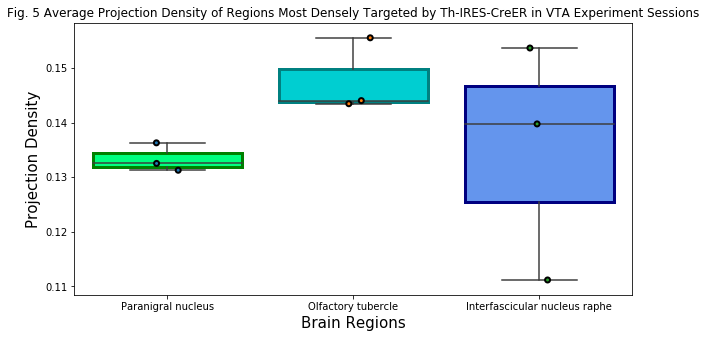

In [59]:
plt.figure(figsize=(10,5))
#Make a list of VTA Th-IRES-CreER data
VTA_Th_IRES_CreER_data = [e1_VTA_Th_IRES_CreER]
#Make empty list for regions with highest projection densities
top = []
#Start for loop with in VTA_Th_IRES_CreER_data
for i in VTA_Th_IRES_CreER_data:
    clean_data = i.text.split('\n') #Remove unnecessary parts of the strings
    proj_density = [] #Empty list for projection density values
    region_names = [] #Empty list for name of regions 
    #Nestled for loop to remove unnecessary parts of the projection density and safe name strings
    for j in clean_data:
        if 'projection-density' in j: #Call all projection density numbers
            proj_1 = j.split('</')
            proj_2 = proj_1[0].split('>')
            proj_density.append(float(proj_2[1])) #Add the numbers as floats to the list
        if 'safe-name' in j: #Call all names 
            region_name_1 = j.split('</')
            region_name_2 = region_name_1[0].split('>')
            region_names.append(region_name_2[1])
            
data_dict = {'Name':region_names, 'Projection density':proj_density} #Dictionary of Name and Proj density values
data_df = pd.DataFrame(data_dict) #Make dict into df
data_df_sorted = data_df.sort_values(by= 'Projection density',ascending = False) #Organize projection values by descending order
data_df_reset = data_df_sorted.set_index('Name') #Set first column to be Name
top.append(data_df_reset.head()) 
top #Print to know which regions have the highest projection densities
#To narrow down the information for the top three regions being projected to 

#Create empty lists
VTA_Th_IRES_CreER_regions = []
VTA_Th_IRES_CreER_index = []
VTA_Th_IRES_CreER_projdens = []
#Create a for loop to add all the times each region is in the list 
for i in data_df['Name']:
    if i == 'Olfactory tubercle':
        VTA_Th_IRES_CreER_regions.append(i)
    if i == 'Paranigral nucleus':
        VTA_Th_IRES_CreER_regions.append(i)
    if i == 'Interfascicular nucleus raphe':
        VTA_Th_IRES_CreER_regions.append(i)
#Get all regions' indices
VTA_Th_IRES_CreER_index1 = (data_df[data_df['Name']=='Olfactory tubercle'].index.values.astype(int))[0]
VTA_Th_IRES_CreER_index2 = (data_df[data_df['Name']=='Olfactory tubercle'].index.values.astype(int))[1]
VTA_Th_IRES_CreER_index3 = (data_df[data_df['Name']=='Olfactory tubercle'].index.values.astype(int))[2]
VTA_Th_IRES_CreER_index4 = (data_df[data_df['Name']=='Paranigral nucleus'].index.values.astype(int))[0]
VTA_Th_IRES_CreER_index5 = (data_df[data_df['Name']=='Paranigral nucleus'].index.values.astype(int))[1]
VTA_Th_IRES_CreER_index6 = (data_df[data_df['Name']=='Paranigral nucleus'].index.values.astype(int))[2]
VTA_Th_IRES_CreER_index7 = (data_df[data_df['Name']=='Interfascicular nucleus raphe'].index.values.astype(int))[0]
VTA_Th_IRES_CreER_index8 = (data_df[data_df['Name']=='Interfascicular nucleus raphe'].index.values.astype(int))[1]
VTA_Th_IRES_CreER_index9 = (data_df[data_df['Name']=='Interfascicular nucleus raphe'].index.values.astype(int))[2]
#Create a list of indices
VTA_Th_IRES_CreER_index = [VTA_Th_IRES_CreER_index1,VTA_Th_IRES_CreER_index2,VTA_Th_IRES_CreER_index3,VTA_Th_IRES_CreER_index4,VTA_Th_IRES_CreER_index5,VTA_Th_IRES_CreER_index6,VTA_Th_IRES_CreER_index7,VTA_Th_IRES_CreER_index8,VTA_Th_IRES_CreER_index9]
#Create a list of projection densities for those regions
for i in VTA_Th_IRES_CreER_index:
    VTA_Th_IRES_CreER_projdens.append(data_df['Projection density'][i])

#Create a dataframe of top three regions and their projection values
VTA_Th_IRES_CreER_df = pd.DataFrame({'VTA Th-IRES-CreER Regions':VTA_Th_IRES_CreER_regions,'Projection Density':VTA_Th_IRES_CreER_projdens})
#Create a boxplot of the data
VTA_Th_IRES_CreER_boxplot = sns.boxplot(x = 'VTA Th-IRES-CreER Regions', y = 'Projection Density', data = VTA_Th_IRES_CreER_df)
sns.stripplot(x='VTA Th-IRES-CreER Regions', y='Projection Density',data=VTA_Th_IRES_CreER_df, jitter=True,linewidth=2,edgecolor='black')
#Create boxplot variables and style the boxplots
regions = ['Olfactory tubercle','Paranigral nucleus','Interfascicular nucleus raphe']
box_facecolors = ['springgreen', 'darkturquoise', 'cornflowerblue'] #Set boxplot face colors
box_edgecolors = ['g','teal','navy'] #Set boxplot edge colors
box_facecolor_dict = dict(zip(regions,box_facecolors))
box_edgecolor_dict = dict(zip(regions,box_edgecolors))
#Create a for loop to style boxplots
for i in range(0,3):
    mybox = VTA_Th_IRES_CreER_boxplot.artists[i]
    mybox.set_facecolor(box_facecolor_dict[regions[i]])
    mybox.set_edgecolor(box_edgecolor_dict[regions[i]])
    mybox.set_linewidth(3)
    VTA_Th_IRES_CreER_boxplot.set_title('Fig. 5 Average Projection Density of Regions Most Densely Targeted by Th-IRES-CreER in VTA Experiment Sessions', fontsize=12)
    plt.xlabel('Brain Regions', fontsize=15)
    plt.ylabel('Projection Density', fontsize=15)
    plt.tick_params('both', labelsize='10')
VTA_Th_IRES_CreER_df #Print the dataframe to see the observation points

Fig. 5 The graph visualizes the average distribution of projection densities for the top three regions the *TH* gene in the VTA projects to. The top three regions are the paranigral nucleus, olfactory tubercle, and interfascicular nucleus raphe. The interfascicular nucleus raphe has a larger range than the paranigral nucleus and olfactory tubercle, which suggests there is more variation in the projection densities for the interfascicular nucleus raphe than the other two regions. The paranigral nucleus has a very narrow range, which suggests the projection density data is representative of the projection to the paranigral nucleus. 

## VTA Th-Cre-FI172 Graph

,VTA Th-Cre-FI172 Regions,Projection Density
0,Preparasubthalamic nucleus,0.075019
1,cerebral nuclei related,0.000033
2,Medial accesory oculomotor nucleus,0.037474
3,Preparasubthalamic nucleus,0.017513
4,cerebral nuclei related,0.000005
5,cerebral nuclei related,0.035021
6,Medial accesory oculomotor nucleus,0.000033
7,Preparasubthalamic nucleus,0.031147
8,Medial accesory oculomotor nucleus,0.015590


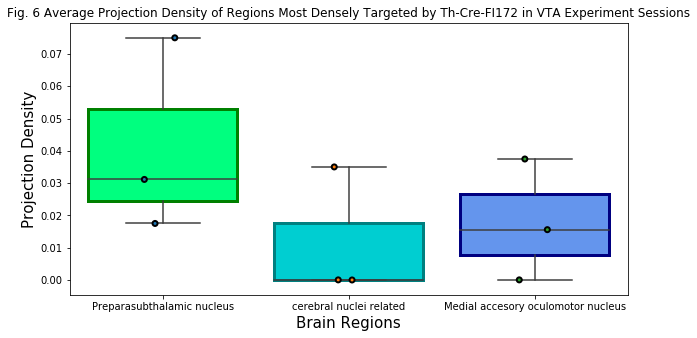

In [60]:
plt.figure(figsize=(10,5))
#Make a list of VTA Th-Cre-FI172 data
VTA_Th_Cre_FI172_data = [e1_VTA_Th_Cre_FI172]
#Make empty list for regions with highest projection densities
top = []
#Start for loop with in VTA_Th_Cre_FI172_data
for i in VTA_Th_Cre_FI172_data:
    clean_data = i.text.split('\n') #Remove unnecessary parts of the strings
    proj_density = [] #Empty list for projection density values
    region_names = [] #Empty list for name of regions 
    #Nestled for loop to remove unnecessary parts of the projection density and safe name strings
    for j in clean_data:
        if 'projection-density' in j: #Call all projection density numbers
            proj_1 = j.split('</')
            proj_2 = proj_1[0].split('>')
            proj_density.append(float(proj_2[1])) #Add the numbers as floats to the list
        if 'safe-name' in j: #Call all names 
            region_name_1 = j.split('</')
            region_name_2 = region_name_1[0].split('>')
            region_names.append(region_name_2[1])
            
data_dict = {'Name':region_names, 'Projection density':proj_density} #Dictionary of Name and Proj density values
data_df = pd.DataFrame(data_dict) #Make dict into df
data_df_sorted = data_df.sort_values(by= 'Projection density',ascending = False) #Organize projection values by descending order
data_df_reset = data_df_sorted.set_index('Name') #Set first column to be Name
top.append(data_df_reset.head()) 
top #Print to know which regions have the highest projection densities
#To narrow down the information for the top three regions being projected to 
#Create empty lists
VTA_Th_Cre_FI172_regions = []
VTA_Th_Cre_FI172_index = []
VTA_Th_Cre_FI172_projdens = []
#Create a for loop to add all the times each region is in the list 
for i in data_df['Name']:
    if i == 'Medial accesory oculomotor nucleus':
        VTA_Th_Cre_FI172_regions.append(i)
    if i == 'Preparasubthalamic nucleus':
        VTA_Th_Cre_FI172_regions.append(i)
    if i == 'cerebral nuclei related':
        VTA_Th_Cre_FI172_regions.append(i)
#Get all regions' indices
VTA_Th_Cre_FI172_index1 = (data_df[data_df['Name']=='Medial accesory oculomotor nucleus'].index.values.astype(int))[0]
VTA_Th_Cre_FI172_index2 = (data_df[data_df['Name']=='Medial accesory oculomotor nucleus'].index.values.astype(int))[1]
VTA_Th_Cre_FI172_index3 = (data_df[data_df['Name']=='Medial accesory oculomotor nucleus'].index.values.astype(int))[2]
VTA_Th_Cre_FI172_index4 = (data_df[data_df['Name']=='Preparasubthalamic nucleus'].index.values.astype(int))[0]
VTA_Th_Cre_FI172_index5 = (data_df[data_df['Name']=='Preparasubthalamic nucleus'].index.values.astype(int))[1]
VTA_Th_Cre_FI172_index6 = (data_df[data_df['Name']=='Preparasubthalamic nucleus'].index.values.astype(int))[2]
VTA_Th_Cre_FI172_index7 = (data_df[data_df['Name']=='cerebral nuclei related'].index.values.astype(int))[0]
VTA_Th_Cre_FI172_index8 = (data_df[data_df['Name']=='cerebral nuclei related'].index.values.astype(int))[1]
VTA_Th_Cre_FI172_index9 = (data_df[data_df['Name']=='cerebral nuclei related'].index.values.astype(int))[2]
#Create a list of indices
VTA_Th_Cre_FI172_index = [VTA_Th_Cre_FI172_index1,VTA_Th_Cre_FI172_index2,VTA_Th_Cre_FI172_index3,VTA_Th_Cre_FI172_index4,VTA_Th_Cre_FI172_index5,VTA_Th_Cre_FI172_index6,VTA_Th_Cre_FI172_index7,VTA_Th_Cre_FI172_index8,VTA_Th_Cre_FI172_index9]
#Create a list of projection densities for those regions
for i in VTA_Th_Cre_FI172_index:
    VTA_Th_Cre_FI172_projdens.append(data_df['Projection density'][i])

#Create a dataframe of top three regions and their projection values
VTA_Th_Cre_FI172_df = pd.DataFrame({'VTA Th-Cre-FI172 Regions':VTA_Th_Cre_FI172_regions,'Projection Density':VTA_Th_Cre_FI172_projdens})
#Create a boxplot of the data
VTA_Th_Cre_FI172_boxplot = sns.boxplot(x = 'VTA Th-Cre-FI172 Regions', y = 'Projection Density', data = VTA_Th_Cre_FI172_df)
sns.stripplot(x='VTA Th-Cre-FI172 Regions', y='Projection Density',data=VTA_Th_Cre_FI172_df, jitter=True,linewidth=2,edgecolor='black')
#Create boxplot variables and style the boxplots
regions = ['Medial accesory oculomotor nucleus','Preparasubthalamic nucleus','cerebral nuclei related']
box_facecolors = ['springgreen', 'darkturquoise', 'cornflowerblue'] #Set boxplot face colors
box_edgecolors = ['g','teal','navy'] #Set boxplot edge colors
box_facecolor_dict = dict(zip(regions,box_facecolors))
box_edgecolor_dict = dict(zip(regions,box_edgecolors))
#Create a for loop to style boxplots
for i in range(0,3):
    mybox = VTA_Th_Cre_FI172_boxplot.artists[i]
    mybox.set_facecolor(box_facecolor_dict[regions[i]])
    mybox.set_edgecolor(box_edgecolor_dict[regions[i]])
    mybox.set_linewidth(3)
    VTA_Th_Cre_FI172_boxplot.set_title('Fig. 6 Average Projection Density of Regions Most Densely Targeted by Th-Cre-FI172 in VTA Experiment Sessions', fontsize=12)
    plt.xlabel('Brain Regions', fontsize=15)
    plt.ylabel('Projection Density', fontsize=15)
    plt.tick_params('both', labelsize='10')
VTA_Th_Cre_FI172_df #Print the dataframe to see the observation points

Fig. 6 The graph visualizes the average distribution of projection densities for the top three regions the *TH* gene in the VTA projects to. The top three regions are the preparasubthalamic nucleus, cerebral nuclei related region, and medial accessory oculomotor nucleus. The three regions seem to have relatively similar broad ranges of projection densities, which suggests there is a similar amount of variation in projection densities.


## SNr WT Graph

,SNr WT Regions,Projection Density
0,nigrostriatal tract,0.166282
1,Midbrain reticular nucleus retrorubral area,0.083428
2,cerebral nuclei related,0.000573
3,nigrostriatal tract,0.125387
4,nigrostriatal tract,0.000368
5,cerebral nuclei related,0.062877
6,Midbrain reticular nucleus retrorubral area,0.125387
7,Midbrain reticular nucleus retrorubral area,0.062877
8,cerebral nuclei related,0.000368


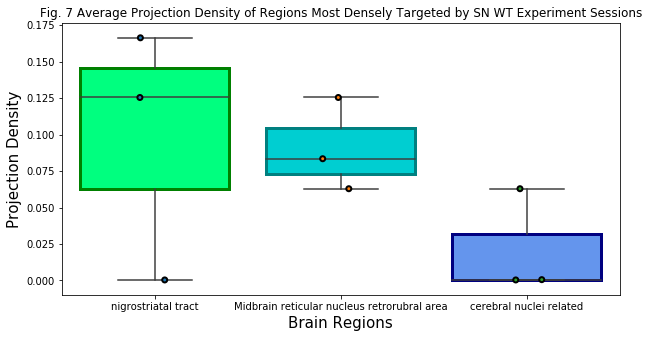

In [61]:
plt.figure(figsize=(10,5))
#Make a list of SNr WT data
SNr_WT_data = [e1_SNr_WT,e2_SNr_WT,e3_SNr_WT]
#Make empty list for regions with highest projection densities
top = []
#Start for loop with in SNr_WT_data
for i in SNr_WT_data:
    clean_data = i.text.split('\n') #Remove unnecessary parts of the strings
    proj_density = [] #Empty list for projection density values
    region_names = [] #Empty list for name of regions 
    #Nestled for loop to remove unnecessary parts of the projection density and safe name strings
    for j in clean_data:
        if 'projection-density' in j: #Call all projection density numbers
            proj_1 = j.split('</')
            proj_2 = proj_1[0].split('>')
            proj_density.append(float(proj_2[1])) #Add the numbers as floats to the list
        if 'safe-name' in j: #Call all names 
            region_name_1 = j.split('</')
            region_name_2 = region_name_1[0].split('>')
            region_names.append(region_name_2[1])
            
data_dict = {'Name':region_names, 'Projection density':proj_density} #Dictionary of Name and Proj density values
data_df = pd.DataFrame(data_dict) #Make dict into df
data_df_sorted = data_df.sort_values(by= 'Projection density',ascending = False) #Organize projection values by descending order
data_df_reset = data_df_sorted.set_index('Name') #Set first column to be Name
top.append(data_df_reset.head()) 
top #Print to know which regions have the highest projection densities
#To narrow down the information for the top three regions being projected to 
#Create empty lists
SNr_WT_regions = []
SNr_WT_index = []
SNr_WT_projdens = []
#Create a for loop to add all the times each region is in the list 
for i in data_df['Name']:
    if i == 'Midbrain reticular nucleus retrorubral area':
        SNr_WT_regions.append(i)
    if i == 'nigrostriatal tract':
        SNr_WT_regions.append(i)
    if i == 'cerebral nuclei related':
        SNr_WT_regions.append(i)
#Get all regions' indices
SNr_WT_index1 = (data_df[data_df['Name']=='Midbrain reticular nucleus retrorubral area'].index.values.astype(int))[0]
SNr_WT_index2 = (data_df[data_df['Name']=='Midbrain reticular nucleus retrorubral area'].index.values.astype(int))[1]
SNr_WT_index3 = (data_df[data_df['Name']=='Midbrain reticular nucleus retrorubral area'].index.values.astype(int))[2]
SNr_WT_index4 = (data_df[data_df['Name']=='nigrostriatal tract'].index.values.astype(int))[0]
SNr_WT_index5 = (data_df[data_df['Name']=='nigrostriatal tract'].index.values.astype(int))[1]
SNr_WT_index6 = (data_df[data_df['Name']=='nigrostriatal tract'].index.values.astype(int))[2]
SNr_WT_index7 = (data_df[data_df['Name']=='cerebral nuclei related'].index.values.astype(int))[0]
SNr_WT_index8 = (data_df[data_df['Name']=='cerebral nuclei related'].index.values.astype(int))[1]
SNr_WT_index9 = (data_df[data_df['Name']=='cerebral nuclei related'].index.values.astype(int))[2]
#Create a list of indices
SNr_WT_index = [SNr_WT_index1,SNr_WT_index2,SNr_WT_index3,SNr_WT_index4,SNr_WT_index5,SNr_WT_index6,SNr_WT_index7,SNr_WT_index8,SNr_WT_index9]
#Create a list of projection densities for those regions
for i in SNr_WT_index:
    SNr_WT_projdens.append(data_df['Projection density'][i])

#Create a dataframe of top three regions and their projection values
SNr_WT_df = pd.DataFrame({'SNr WT Regions':SNr_WT_regions,'Projection Density':SNr_WT_projdens})
#Create a boxplot of the data
SNr_WT_boxplot = sns.boxplot(x = 'SNr WT Regions', y = 'Projection Density', data = SNr_WT_df)
sns.stripplot(x='SNr WT Regions', y='Projection Density',data=SNr_WT_df, jitter=True,linewidth=2,edgecolor='black')
#Create boxplot variables and style the boxplots
regions = ['Midbrain reticular nucleus retrorubral area','nigrostriatal tract','cerebral nuclei related']
box_facecolors = ['springgreen', 'darkturquoise', 'cornflowerblue'] #Set boxplot face colors
box_edgecolors = ['g','teal','navy'] #Set boxplot edge colors
box_facecolor_dict = dict(zip(regions,box_facecolors))
box_edgecolor_dict = dict(zip(regions,box_edgecolors))
#Create a for loop to style boxplots
for i in range(0,3):
    mybox = SNr_WT_boxplot.artists[i]
    mybox.set_facecolor(box_facecolor_dict[regions[i]])
    mybox.set_edgecolor(box_edgecolor_dict[regions[i]])
    mybox.set_linewidth(3)
    SNr_WT_boxplot.set_title('Fig. 7 Average Projection Density of Regions Most Densely Targeted by SN WT Experiment Sessions', fontsize=12)
    plt.xlabel('Brain Regions', fontsize=15)
    plt.ylabel('Projection Density', fontsize=15)
    plt.tick_params('both', labelsize='10')
SNr_WT_df #Print the dataframe to see the observation points

Fig. 7 The graph visualizes the average distribution of projection densities for the top three regions the SNr projects to in control cases. The top three regions are the nigrostriatal tract, midbrain reticular nucleus retrorubral area, and cerebral nuclei related region. The nigrostriatal tract has a larger range than the midbrain reticular nucleus retrorubral area and cerebral nuclei related region, which suggests there is more variation in the projection densities of the nigrostriatal tract than in the other two regions.


## VTA WT Graphs

,VTA WT Regions,Projection Density
0,medial forebrain bundle,0.407469
1,Paranigral nucleus,0.301897
2,medial forebrain bundle,0.529938
3,medial forebrain bundle,0.227051
4,direct tectospinal pathway,0.190403
5,Paranigral nucleus,0.273716
6,direct tectospinal pathway,0.013230
7,Paranigral nucleus,0.270244
8,direct tectospinal pathway,0.141737


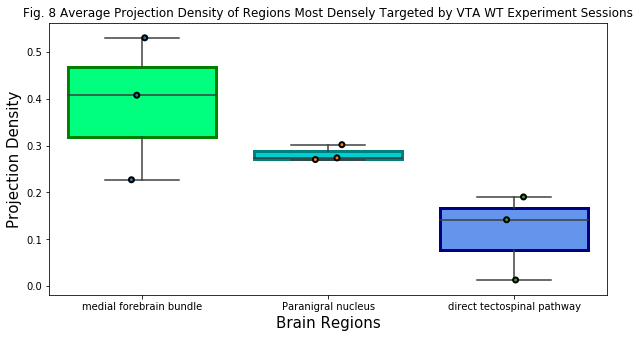

In [62]:
plt.figure(figsize=(10,5))
#Make a list of VTA WT data
VTA_WT_data = [e1_VTA_WT,e2_VTA_WT]
#Make empty list for regions with highest projection densities
top = []
#Start for loop with in SNr_WT_data
for i in VTA_WT_data:
    clean_data = i.text.split('\n') #Remove unnecessary parts of the strings
    proj_density = [] #Empty list for projection density values
    region_names = [] #Empty list for name of regions 
    #Nestled for loop to remove unnecessary parts of the projection density and safe name strings
    for j in clean_data:
        if 'projection-density' in j: #Call all projection density numbers
            proj_1 = j.split('</')
            proj_2 = proj_1[0].split('>')
            proj_density.append(float(proj_2[1])) #Add the numbers as floats to the list
        if 'safe-name' in j: #Call all names 
            region_name_1 = j.split('</')
            region_name_2 = region_name_1[0].split('>')
            region_names.append(region_name_2[1])
            
data_dict = {'Name':region_names, 'Projection density':proj_density} #Dictionary of Name and Proj density values
data_df = pd.DataFrame(data_dict) #Make dict into df
data_df_sorted = data_df.sort_values(by= 'Projection density',ascending = False) #Organize projection values by descending order
data_df_reset = data_df_sorted.set_index('Name') #Set first column to be Name
top.append(data_df_reset.head()) 
top #Print to know which regions have the highest projection densities
#To narrow down the information for the top three regions being projected to 
#Create empty lists
VTA_WT_regions = []
VTA_WT_index = []
VTA_WT_projdens = []
#Create a for loop to add all the times each region is in the list 
for i in data_df['Name']:
    if i == 'medial forebrain bundle':
        VTA_WT_regions.append(i)
    if i == 'Paranigral nucleus':
        VTA_WT_regions.append(i)
    if i == 'direct tectospinal pathway':
        VTA_WT_regions.append(i)
#Get all regions' indices
VTA_WT_index1 = (data_df[data_df['Name']=='medial forebrain bundle'].index.values.astype(int))[0]
VTA_WT_index2 = (data_df[data_df['Name']=='medial forebrain bundle'].index.values.astype(int))[1]
VTA_WT_index3 = (data_df[data_df['Name']=='medial forebrain bundle'].index.values.astype(int))[2]
VTA_WT_index4 = (data_df[data_df['Name']=='Paranigral nucleus'].index.values.astype(int))[0]
VTA_WT_index5 = (data_df[data_df['Name']=='Paranigral nucleus'].index.values.astype(int))[1]
VTA_WT_index6 = (data_df[data_df['Name']=='Paranigral nucleus'].index.values.astype(int))[2]
VTA_WT_index7 = (data_df[data_df['Name']=='direct tectospinal pathway'].index.values.astype(int))[0]
VTA_WT_index8 = (data_df[data_df['Name']=='direct tectospinal pathway'].index.values.astype(int))[1]
VTA_WT_index9 = (data_df[data_df['Name']=='direct tectospinal pathway'].index.values.astype(int))[2]
#Create a list of indices
VTA_WT_index = [VTA_WT_index1,VTA_WT_index2,VTA_WT_index3,VTA_WT_index4,VTA_WT_index5,VTA_WT_index6,VTA_WT_index7,VTA_WT_index8,VTA_WT_index9]
#Create a list of projection densities for those regions
for i in VTA_WT_index:
    VTA_WT_projdens.append(data_df['Projection density'][i])

#Create a dataframe of top three regions and their projection values
VTA_WT_df = pd.DataFrame({'VTA WT Regions':VTA_WT_regions,'Projection Density':VTA_WT_projdens})
#Create a boxplot of the data
VTA_WT_boxplot = sns.boxplot(x = 'VTA WT Regions', y = 'Projection Density', data = VTA_WT_df)
sns.stripplot(x='VTA WT Regions', y='Projection Density',data=VTA_WT_df, jitter=True,linewidth=2,edgecolor='black')
#Create boxplot variables and style the boxplots
regions = ['medial forebrain bundle','Paranigral nucleus','direct tectospinal pathway']
box_facecolors = ['springgreen', 'darkturquoise', 'cornflowerblue'] #Set boxplot face colors
box_edgecolors = ['g','teal','navy'] #Set boxplot edge colors
box_facecolor_dict = dict(zip(regions,box_facecolors))
box_edgecolor_dict = dict(zip(regions,box_edgecolors))
#Create a for loop to style boxplots
for i in range(0,3):
    mybox = VTA_WT_boxplot.artists[i]
    mybox.set_facecolor(box_facecolor_dict[regions[i]])
    mybox.set_edgecolor(box_edgecolor_dict[regions[i]])
    mybox.set_linewidth(3)
    VTA_WT_boxplot.set_title('Fig. 8 Average Projection Density of Regions Most Densely Targeted by VTA WT Experiment Sessions', fontsize=12)
    plt.xlabel('Brain Regions', fontsize=15)
    plt.ylabel('Projection Density', fontsize=15)
    plt.tick_params('both', labelsize='10')
VTA_WT_df #Print the dataframe to see the observation points

Fig. 8 The graph visualizes the average distribution of projection densities for the top three regions the VTA projects to in control cases. The top three regions are the medial forebrain bundle, paranigral nucleus, and direct tectospinal pathway. The paranigral nucleus has a very narrow range, which suggests the projection density data is representative of the projection to the paranigral nucleus. The range of the other two regions are relatively broad in comparison to that of paranigral nucleus, which suggests there is more variation in the projection densities for these two regions.

# GPe WT Graph

,GPe WT Regions,Projection Density
0,Paracentral nucleus,0.134993
1,Paracentral nucleus,0.000000
2,Subthalamic nucleus,0.269985
3,Paracentral nucleus,0.184534
4,Parafascicular nucleus,0.019594
5,Subthalamic nucleus,0.102064
6,Parafascicular nucleus,0.060651
7,Subthalamic nucleus,0.008066
8,Parafascicular nucleus,0.113236


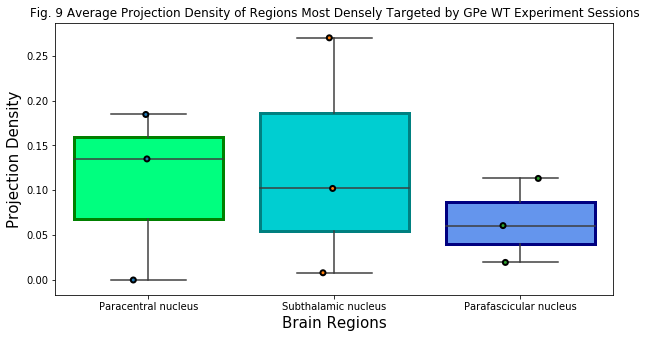

In [63]:
plt.figure(figsize=(10,5))
#Make a list of GPe WT data
GPe_WT_data = [e1_GPe_WT]
#Make empty list for regions with highest projection densities
top = []
#Start for loop with in SNr_WT_data
for i in GPe_WT_data:
    clean_data = i.text.split('\n') #Remove unnecessary parts of the strings
    proj_density = [] #Empty list for projection density values
    region_names = [] #Empty list for name of regions 
    #Nestled for loop to remove unnecessary parts of the projection density and safe name strings
    for j in clean_data:
        if 'projection-density' in j: #Call all projection density numbers
            proj_1 = j.split('</')
            proj_2 = proj_1[0].split('>')
            proj_density.append(float(proj_2[1])) #Add the numbers as floats to the list
        if 'safe-name' in j: #Call all names 
            region_name_1 = j.split('</')
            region_name_2 = region_name_1[0].split('>')
            region_names.append(region_name_2[1])
            
data_dict = {'Name':region_names, 'Projection density':proj_density} #Dictionary of Name and Proj density values
data_df = pd.DataFrame(data_dict) #Make dict into df
data_df_sorted = data_df.sort_values(by= 'Projection density',ascending = False) #Organize projection values by descending order
data_df_reset = data_df_sorted.set_index('Name') #Set first column to be Name
top.append(data_df_reset.head()) 
top #Print to know which regions have the highest projection densities
#To narrow down the information for the top three regions being projected to 
#Create empty lists
GPe_WT_regions = []
GPe_WT_index = []
GPe_WT_projdens = []
#Create a for loop to add all the times each region is in the list 
for i in data_df['Name']:
    if i == 'Subthalamic nucleus':
        GPe_WT_regions.append(i)
    if i == 'Parafascicular nucleus':
        GPe_WT_regions.append(i)
    if i == 'Paracentral nucleus':
        GPe_WT_regions.append(i)
#Get all regions' indices
GPe_WT_index1 = (data_df[data_df['Name']=='Subthalamic nucleus'].index.values.astype(int))[0]
GPe_WT_index2 = (data_df[data_df['Name']=='Subthalamic nucleus'].index.values.astype(int))[1]
GPe_WT_index3 = (data_df[data_df['Name']=='Subthalamic nucleus'].index.values.astype(int))[2]
GPe_WT_index4 = (data_df[data_df['Name']=='Parafascicular nucleus'].index.values.astype(int))[0]
GPe_WT_index5 = (data_df[data_df['Name']=='Parafascicular nucleus'].index.values.astype(int))[1]
GPe_WT_index6 = (data_df[data_df['Name']=='Parafascicular nucleus'].index.values.astype(int))[2]
GPe_WT_index7 = (data_df[data_df['Name']=='Paracentral nucleus'].index.values.astype(int))[0]
GPe_WT_index8 = (data_df[data_df['Name']=='Paracentral nucleus'].index.values.astype(int))[1]
GPe_WT_index9 = (data_df[data_df['Name']=='Paracentral nucleus'].index.values.astype(int))[2]
#Create a list of indices
GPe_WT_index = [GPe_WT_index1,GPe_WT_index2,GPe_WT_index3,GPe_WT_index4,GPe_WT_index5,GPe_WT_index6,GPe_WT_index7,GPe_WT_index8,GPe_WT_index9]
#Create a list of projection densities for those regions
for i in GPe_WT_index:
    GPe_WT_projdens.append(data_df['Projection density'][i])

#Create a dataframe of top three regions and their projection values
GPe_WT_df = pd.DataFrame({'GPe WT Regions':GPe_WT_regions,'Projection Density':GPe_WT_projdens})
#Create a boxplot of the data
GPe_WT_boxplot = sns.boxplot(x = 'GPe WT Regions', y = 'Projection Density', data = GPe_WT_df)
sns.stripplot(x='GPe WT Regions', y='Projection Density',data=GPe_WT_df, jitter=True,linewidth=2,edgecolor='black')
#Create boxplot variables and style the boxplots
regions = ['Subthalamic nucleus','Parafascicular nucleus','Paracentral nucleus']
box_facecolors = ['springgreen', 'darkturquoise', 'cornflowerblue'] #Set boxplot face colors
box_edgecolors = ['g','teal','navy'] #Set boxplot edge colors
box_facecolor_dict = dict(zip(regions,box_facecolors))
box_edgecolor_dict = dict(zip(regions,box_edgecolors))
#Create a for loop to style boxplots
for i in range(0,3):
    mybox = GPe_WT_boxplot.artists[i]
    mybox.set_facecolor(box_facecolor_dict[regions[i]])
    mybox.set_edgecolor(box_edgecolor_dict[regions[i]])
    mybox.set_linewidth(3)
    GPe_WT_boxplot.set_title('Fig. 9 Average Projection Density of Regions Most Densely Targeted by GPe WT Experiment Sessions', fontsize=12)
    plt.xlabel('Brain Regions', fontsize=15)
    plt.ylabel('Projection Density', fontsize=15)
    plt.tick_params('both', labelsize='10')
GPe_WT_df #Print the dataframe to see the observation points

Fig. 9 The graph visualizes the average distribution of projection densities for the top three regions the VTA projects to in control cases. The top three regions are the paracentral nucleus, subthalamic nucleus, parafascicular nucleus. The paracentral nucleus and subthalamic nucleus have a larger range than the parafascicular nucleus, which suggests there is less variation in the projection densities in the parafascicular nucleus than the other two regions.

# Visualizing Projection Density

The purpose of the Cre/Lox method is to idenitfy cells that express the gene associated with the Cre line. We are then able to visualize this in the cells due to the fluorescent nature of the proteins being expressed. Additionally, we can follow the path of the of the expressed fluorescent protein and all the neurons it's active in and what neurons they're projecting too. Based on the intensity of fluorescence, we can estimate the relative concentration levels in the neurons.

# Visualizing a VTA Slc6a3-Cre Experiment and its Projection Density 

Below we take an individual VTA Slc6a3-Cre and plot its projection intensity using another feature of the MouseConnectivityCache to show an example of what an image of the fluorescence would look like.

In [64]:
#VTA pictures exp id = [160539283]
slc6VTAexperiment_id = 160539283

In [65]:
#Projection density: number of projecting pixels / voxel volume
pd, pd_info = mcc.get_projection_density(slc6VTAexperiment_id)
#pd1, pd_info1 = mcc.get_projection_density(WT_VTAexperiment_id)

#Injection density: number of projecting pixels in injection site / voxel volume
#ind, ind_info = mcc.get_injection_density(slc6VTAexperiment_id)

#Data mask:
#Binary mask indicating which voxels contain valid data
#dm, dm_info = mcc.get_data_mask(slc6VTAexperiment_id)

#template, template_info = mcc.get_template_volume()
#annot, annot_info = mcc.get_annotation_volume()

#In addition to the annotation volume, you can get binary masks for individual structures
#VTA_mask, cm_info = mcc.get_structure_mask(314)


In [66]:
#Injection density: number of projecting pixels in injection site / voxel volume
ind, ind_info = mcc.get_injection_density(slc6VTAexperiment_id)

In [67]:
#Data mask:
#Binary mask indicating which voxels contain valid data
dm, dm_info = mcc.get_data_mask(slc6VTAexperiment_id)

In [68]:
template, template_info = mcc.get_template_volume()

In [69]:
annot, annot_info = mcc.get_annotation_volume()

In [70]:
#In addition to the annotation volume, you can get binary masks for individual structures
VTA_mask, cm_info = mcc.get_structure_mask(314)

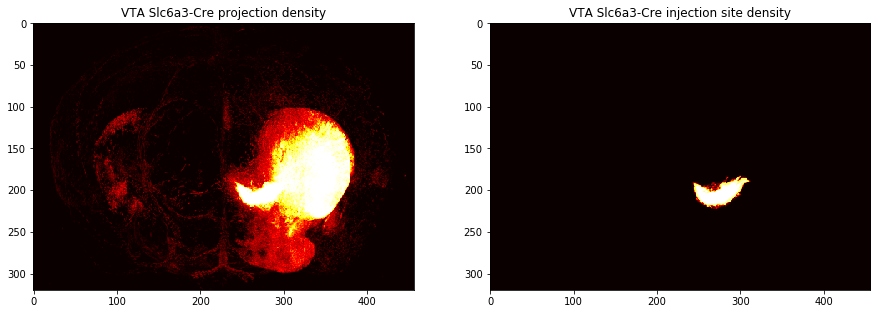

In [71]:
#Compute the maximum intensity projection of the projection data
pd_mip = pd.max(axis=0)
ind_mip = ind.max(axis=0)

#Show that slice of all volumes side-by-side
f, pr_axes = plt.subplots(1, 2, figsize=(15, 6))

pr_axes[0].imshow(pd_mip, cmap='hot', aspect='equal')
pr_axes[0].set_title("VTA Slc6a3-Cre projection density")

pr_axes[1].imshow(ind_mip, cmap='hot', aspect='equal')
pr_axes[1].set_title("VTA Slc6a3-Cre injection site density")

plt.show()

# Data Analysis & Results

We found that *SLC6A3* and *TH* are highly expressed in the SNr and VTA, but are expressed in lower amounts in the GPe. Furthermore, we found that *DBH* is expressed at lower levels in all three brain regions of SNr, VTA, and the GPe. For the projection data, we found the top three regions with the highest average projection density for each available Cre-line and WT. 10/18 downstream projected regions were part of the basal ganglia; the others were part of other related structures as well, such as the thalamus and the VTA.

Due to the limited nature of our data, we couldn’t easily do statistical analysis and tests on it. Therefore, we mainly relied on descriptive analysis and qualitative understanding of our results, since the data sample was smaller and hard to do tests on.


# Conclusion & Discussion

**a. Microarray**

In terms of brain structures, our three main regions of interest are all intrinsically connected in relation to the basal ganglia and are either part of the network or serve essential functions for it [29]. In the motor circuitry of the basal ganglia, the striatum inhibits the GPe, which then leads to the downstream excitation of the SNr. The VTA also indirectly inhibits the GPe through a different pathway, but also eventually leads to the downstream excitation of the SNr [16].

According to the graphs that were created from our results, gene expression of our target genes are affected in the SNr, VTA, and GPe. We found that *SLC6A3* and *TH* are highly expressed in the SNr and VTA, but are expressed in lower amounts in the GPe. Furthermore, we found that *DBH* is expressed at lower levels in all three brain regions of SNr, VTA, and the GPe. 

The result that *SLC6A3* and *TH* are expressed less in the GPe but higher in the VTA and SNr makes sense -- since VTA feeds to the GPe and has high levels of those two genes, its inhibition of GPe should decrease the amount of expression of the genes in that structure. When GPe is inhibited, the SNr is excited in a downstream step, which supports our results that those gene expression levels are high in the SNr as well. *SLC6A3* encodes the protein DAT, which is a dopamine transporter that’s found in the membrane of neurons in the brain and allows for the passage of dopamine into the neuron [30]. *TH* encodes the enzyme tyrosine hydroxylase, which is an enzyme that produces hormones called catecholamines as the first step of a pathway that eventually creates dopamine [33]. Both genes have to do with the production or uptake of dopamine in the cell, which is arguably the most important neurotransmitter that has to do with the pathology associated with PD [34].

*DBH* is a gene that encodes for the enzyme dopamine beta (β)-hydroxylase, which converts dopamine to norepinephrine [13]. The similar expression levels of *DBH* in all three brain regions points to it possibly being regulated in a way that is different than *SLC6A3* and *TH* are being regulated. However, since the expression levels of *DBH* are largely unchanging and are contrary to what we would have expected, the reasoning behind this result cannot be established as well as the other results.

**b. Connectivity**

We studied the transgenic line Slc6a3-Cre in the mouse connectivity data since it was a match to our gene targets that were both a Parkinson’s associated gene and a Cre-line in the connectivity dataset [6]. It’s specific to dopaminergic neurons and is highly expressed in the midbrain, hypothalamus, and olfactory bulb [6]. In our VTA experiments, we were able to filter through experiments that utilized this line and see its projection path toward other brain regions. We discovered that the top three regions this line projected to were the caudoputamen, striatum dorsal regions and the striatum. All of these projected regions are located in the midbrain area -- specifically, in the basal ganglia. These regions have a myriad of functions and capabilities, such as being associated with coordinated behavior, motivation and cognition [9][26][14]. Motivation is strongly reinforced by the neurotransmitter dopamine -- additionally, we know some of the major complications of PD include uncoordianted behavior due to the degeneration of dopaminergic neurons [28][5]; this could explain how dopaminergic transmission may possibly be disrupted if a disruption occurred in the previously mentioned midbrain regions. 

The transgenic line Th-Cre-FI172 is expressed in olfactory areas, cortical amygdalar areas, the hypothalamus, midbrain, pons, medulla and the cerebellum and was also studied in the mouse connectivity data [6]. Among VTA connectivity experiments, this line projected mainly toward the oculomotor nucleus, subthalamic nucleus and the cerebral nucleus. These regions are also incorporated in the basal ganglia and are shown to be involved in coordinated movements, behavior and eyelid contraction [20]. Our projection density data suggest a possible neuronal connection between these regions and the VTA. This may indicate that faulty neurotransmission could possibly lead to undesired muscle contractions such as uncontrollable muscle tremors and impaired vision, which are apparent symptoms of PD [5].

The transgenic line TH-IRES-CreER is expressed within the medulla, pons, midbrain, and hypothalamus [6]. The *TH* gene produces precursor molecules for the neurotransmitter dopamine [5]. Following this line in the VTA experiments, we saw that it largely projects to the olfactory tubercle, paranigral nucleus and the interfascicular nucleus raphe. All of these regions are believed to be involved in the transmission of major neurotransmitters like dopamine, which is strongly believed to influence social behavior [28][11][21]. Faulty transmission between these regions could possibly lead to the emergence of mental health problems, which coincide with PDs mental health problems [18]. 

We also analyzed the projection density and pathway in the wild type VTA. After outputting our data, we saw that the top three brain regions the wild type strain projected to were the medial forebrain bundle, paranigral nucleus, and the direct tectospinal pathway. The medial forebrain and the paranigral nucleus are associated with the reward circuitry of the brain [15] and dopaminergic neurons [19], while the tectospinal pathway is implicated in controlling reflex responses when the body receives visual stimuli [31]. A disruption in this projection pathway may possibly deteriorate the reward circuitry, possibly resulting in mental health problems and lethargy in addition to the appearance of deteriorating coordination in head/neck movement, which parallel the symptoms of PD [28]. 

The last Cre line that we wanted to look into, Dbh-Cre_KH212 [6], is enriched in the pons. Unfortunately, there were no experiments associated with this line in the brain regions that we were interested in, so we continued on and tested our target regions in WT samples without specific gene criteria. Through this, we found that the SNr largely projected to the midbrain reticular nucleus retroburla area, nigrostriatal tract, and the cerebral nuclei. All of these regions are linked to the release of dopamine to influence motivation,  behavior and voluntary movement [8][9][17][22]. Defective communication between these regions could have a negative impact on mental health and movement, perhaps explaining similar symptoms in PD.

The last structure we studied was the GPe, another region implicated in the pathology of PD [16]. Similarly to the SNr, there were no Cre experiments we could analyze, so we looked at WT connectivity again. We found that this region usually projects to the subthalamic nucleus, parafascicular nucleus and the paracentral nucleus, which are all part of the larger structure of the centromedian nucleus. Not only do these regions largely influence the dopaminergic reward system [35], but they also function to control limbic functions of the basal ganglia [32] and help with behavioral flexibility through exciting striatal cholinergic neurons [12]. Degradation of these synapses may lead to alterations in the standard amount of cellular acetylcholine, which in turn could possibly affect voluntary movement and muscle contraction [23][12]; this may explain the phenotype of involuntary muscle contractions usually found among PD patients. 

**c. Limitations**

Although mice are used as a robust model organism, the connectivity and expression between mice and humans are bound to be slightly different; this may affect the reliability of the findings if results cannot be translated between the two species [27]. We were also limited by the regions that we chose -- some patients in the microarray study did not have expression data for the specific regions we wanted, and there were also only 6 patients sampled in the entire microarray study. With a reduction in sample size of an already small sample, our findings may not truly reflect the population. 

Additionally, we were limited by the types of conditions that we could study. By attempting to use both the microarray and connectivity data, we had to have genes that were found in both datasets. With the constraints of PD related genes and available Cre-line genes, we had to narrow our search results down to 3 genes. Furthermore, the molecular causes for the degradation associated with PD have not been specifically pinpointed as of yet; by choosing 3 specific genes out of the hundreds of PD related genes, we merely get a window into the possible affected genes associated with PD. 

With our limited gene targets, we were further limited by the amount of experiments available to use at the Allen Institute. For example, we initially wanted to study our certain transgenic lines in the regions we chose. Unfortunately, the Allen institute didn't have comprehensive experiments in the SNr and GPe. We ultimately used the wild type projection data for all three regions and were only able to compare the VTA wild type to the VTA Cre-line data and use the SNr and GPe wild type data on their own.

**d. Future Experimentation**

Due to the limitations of our study, we feel there is room for further experimentation to understand more how regions affected by PD relate to regions that dopaminergic neurons are projecting to and be able to explain PD symptoms. Since our microarray data does not include information about PD patients, followup experiments performed to gather the gene expression data for the three genes in PD associated brain regions in PD patients with a large sample size would be insightful. We would be able to compare that data to the microarray data we obtained of gene expression in those brain regions for control cases by calculating the fold change. If the log fold change comes out positive, then the gene is upregulated and if it’s negative, the gene is downregulated in that region. 

Another experiment that would be beneficial is one that tests transgenic lines that are specific for *SLC6A3*, *TH*, and *DBH* genes in both control and PD model brains through multiple experiments since we were missing connectivity experimental data and had to rely on non gene-specific wild type information. If we had this data we would be able to compare the projection densities more comprehensively. In this study overall, we were able to identify regions that genes associated with PD in the SNr, VTA, and GPe project to, but we are not able to concretely conclude that these regions will be affected in PD patients and are only suggesting that there is a possible correlation between PD symptoms and the functions of projected regions that could possibly be deteriorated in PD patients.


# References

Primary Sources:

[1] Alberico, Stephanie L et al. “The Vulnerable Ventral Tegmental Area in Parkinson's Disease.” Basal ganglia vol. 5, no. 2-3 (2015): 51-55, Elsevier BV. doi:10.1016/j.baga.2015.06.001.

[2] Hawrylycz, Michael J et al. “An anatomically comprehensive atlas of the adult human brain transcriptome.” Nature vol. 489,7416 (2012): 391-399. doi:10.1038/nature11405.

[3] Kuoppamäki M et al. “Parkinsonism following bilateral lesions of the globus pallidus: performance on a variety of motor tasks shows similarities with Parkinson’s disease.” Journal of Neurology, Neurosurgery & Psychiatry vol. 76, no. 4 (2005): 482-490.

[4] Lein, Ed S et al. “Genome-wide atlas of gene expression in the adult mouse brain.” Nature vol. 445,7124 (2007): 168-76. doi:10.1038/nature05453.

[5] Lukos, J R et al. “Parkinson's disease patients show impaired corrective grasp control and eye-hand coupling when reaching to grasp virtual objects.” Neuroscience vol. 254 (2013): 205-21. doi:10.1016/j.neuroscience.2013.09.026.

[6] Oh, S.W. et al. (2014) A mesoscale connectome of the mouse brain, Nature 508: 207-214. doi:10.1038/nature13186

[7] Simunovic, Filip et al. “Gene expression profiling of substantia nigra dopamine neurons: further insights into Parkinson's disease pathology.” Brain : a journal of neurology vol. 132,Pt 7 (2009): 1795-809. doi:10.1093/brain/awn323

Secondary Sources:

[8] BrainInfo (1991-present), National Primate Research Center, University of Washington, http://braininfo.rprc.washington.edu/centraldirectory.aspx?ID=2677#:~:text=The%20term%20cerebral%20nuclei%20refers,ridge%20of%20the%20embryonic%20Encephalon.&text=The%20other%20components%20of%20the,nuclei%20(%20Swanson%2D2004%20).

[9] BrainInfo (1991-present), National Primate Research Center, University of Washington, http://braininfo.rprc.washington.edu/centraldirectory.aspx?ID=1049#:~:text=The%20term%20retrorubral%20area%20refers,2000%3B%20Paxinos%2D2001%20.

[10] BrainInfo (1991-present), National Primate Research Center, University of Washington, http://braininfo.rprc.washington.edu/centraldirectory.aspx?ID=225#:~:text=In%20the%20striatopallidal%20system%2C%20the,nuclei%20(%20Swanson%2D2004%20).

[11] Brischoux, Frédéric et al. “Phasic excitation of dopamine neurons in ventral VTA by noxious stimuli.” Proceedings of the National Academy of Sciences of the United States of America vol. 106,12 (2009): 4894-9. doi:10.1073/pnas.0811507106
[12] Brown, Holden D et al. “The parafascicular thalamic nucleus concomitantly influences behavioral flexibility and dorsomedial striatal acetylcholine output in rats.” The Journal of neuroscience : the official journal of the Society for Neuroscience vol. 30,43 (2010): 14390-8. doi:10.1523/JNEUROSCI.2167-10.2010
[13] “DBH gene.” Genetics Home Reference. 28 July 2020, https://ghr.nlm.nih.gov/gene/DBH. Accessed 29 July 2020.
[14] Dingman, M. “Know Your Brain: Striatum.” Neuroscientifically Challenged. 7 July 2017, https://www.neuroscientificallychallenged.com/blog/know-your-brain-striatum. Accessed 29 July 2020.
[15] Dubuc, Bruno. “The Reward Circuit.” THE BRAIN FROM TOP TO BOTTOM, 2002, thebrain.mcgill.ca/flash/i/i_03/i_03_cl/i_03_cl_que/i_03_cl_que.html.
[16] Ghosh, Amit Kumar and Hazra, Sutirtha. “Deep Brain Stimulation in Parkinson’s Disease.” Tech Neurosurg Neurol. vol. 2(45): (2019). TNN.000548.2019. doi:10.31031/TNN.2019.02.000548
[17] Grofova, Irena.“Extrinsic Connections of the Neostriatum.” Science Direct, Elsevier BV, 21 Oct. 2013. doi:10.1016/b978-0-08-023174-7.50007-2
[18] Grover, Sandeep et al. “Psychiatric aspects of Parkinson's disease.” Journal of neurosciences in rural practice vol. 6,1 (2015): 65-76. doi:10.4103/0976-3147.143197

[19] Ikemoto, Satoshi. “Dopamine reward circuitry: two projection systems from the ventral midbrain to the nucleus accumbens-olfactory tubercle complex.” Brain research reviews vol. 56,1 (2007): 27-78. doi:10.1016/j.brainresrev.2007.05.004

[20] Joyce, Christopher, et al. “Neuroanatomy, Cranial Nerve 3 (Oculomotor).” StatPearls, StatPearls Publishing, 24 May 2020.
[21] Kopec, Ashley M., et al. “Neuro-Immune Mechanisms Regulating Social Behavior: Dopamine as Mediator?” Trends in Neurosciences, vol. 42, no. 5, May 2019, pp. 337–48. Epmc, doi:10.1016/j.tins.2019.02.005.

[22] Kapalka, George M. “Chapter 7 - Mania and Agitation.” Science Direct, Elsevier BV, 14 May 2010. doi.org/10.1016/B978-0-12-374927-7.00007-8

[23] Kuo, Ivana Y, and Barbara E Ehrlich. “Signaling in muscle contraction.” Cold Spring Harbor perspectives in biology vol. 7,2 a006023. 2 Feb. 2015, doi:10.1101/cshperspect.a006023

[24] Lewis, Patrick A, and Mark R Cookson. “Gene expression in the Parkinson's disease brain.” Brain research bulletin vol. 88,4 (2012): 302-12. doi:10.1016/j.brainresbull.2011.11.016

[25] Marras, C., Beck, J.C., Bower, J.H. et al. Prevalence of Parkinson’s disease across North America. npj Parkinson's Disease 4, 21 (2018). https://doi.org/10.1038/s41531-018-0058-0

[26] Pelloux, Yann and Baunez, Christelle. “Chapter 19 - Harnessing Circuits for the Treatment of Addictive Disorders.” Science Direct, Elsevier BV, 31 Aug. 2018, doi:10.1016/B978-0-12-812202-0.00019-1

[27] Perlman, Robert L. “Mouse models of human disease: An evolutionary perspective.” Evolution, medicine, and public health vol. 2016,1 170-6. 21 May. 2016, doi:10.1093/emph/eow014
[28] Price, J. L. “Olfactory Higher Centers Anatomy.” Science Direct, Elsevier BV, 5 Nov. 2008, doi:10.1016/B978-008045046-9.01692-2.
[29] Rommelfanger, Karen S, and Thomas Wichmann. “Extrastriatal dopaminergic circuits of the Basal Ganglia.” Frontiers in neuroanatomy vol. 4 139. 27 Oct. 2010, doi:10.3389/fnana.2010.00139

[30] “SLC6A3 gene.” Genetics Home Reference. 28 July 2020, https://ghr.nlm.nih.gov/gene/SLC6A3#resources. Accessed 29 July 2020.

[31] "Tectospinal Tract." Physiopedia, . 20 Jul 2019, 13:15 UTC. 30 Jul 2020, 07:33 <https://www.physio-pedia.com/index.php?title=Tectospinal_Tract&oldid=217380>.
[32] Temel, Yasin, et al. “The functional role of the subthalamic nucleus in cognitive and limbic circuits.” Progress in neurobiology vol. 76, 6 (2005): 393-413. doi:10.1016/j.pneurobio.2005.09.005
[33] “Th gene.” Genetics Home Reference. 28 July 2020, https://ghr.nlm.nih.gov/gene/TH. Accessed 29 July 2020.

[34] Triarhou LC. Dopamine and Parkinson's Disease. In: Madame Curie Bioscience Database [Internet]. Austin (TX): Landes Bioscience; 2000-2013. Available from: https://www.ncbi.nlm.nih.gov/books/NBK6271/
[35] Visser-Vandewalle, V. and Kuhn, J. “Chapter 20 - Deep brain stimulation for Tourette syndrome.” Science Direct, Elsevier BV, 7 Oct. 2013. doi:10.1016/b978-0-444-53497-2.00020-6
